# This notebook is for example purposes only. We will show how to download data, make a naive model, produce predictions, and save them in the format covidpredictions.com can recieve them. This is not intended to be used as an accurate prediction of what will happen! 

In [1]:
from matplotlib import pyplot as plt 
%matplotlib inline
import random
import numpy as np
import pandas as pd
import os
import glob
COVID_REPO_PATH = '/Users/francoischaubard/Desktop/blahblah/'
RELATIVE_TIME_SERIES_DATA_PATH = 'csse_covid_19_data/csse_covid_19_time_series/'
RELATIVE_DAILY_SERIES_DATA_PATH = 'csse_covid_19_data/csse_covid_19_daily_reports/'

# Download the latest data

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19.git $COVID_REPO_PATH

Cloning into '/Users/francoischaubard/Desktop/blahblah'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17925 (delta 0), reused 2 (delta 0), pack-reused 17918
Receiving objects: 100% (17925/17925), 70.51 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (9078/9078), done.


In [3]:
print('check to see if valid daily data downloaded')
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_DAILY_SERIES_DATA_PATH)
check_daily=False
for f in glob.glob(DATA_PATH+"*"):
    if f.endswith(".csv"):
#         print(f)
        df = pd.read_csv(f)
        check_daily=True
print('check to see if valid time series data downloaded')
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_TIME_SERIES_DATA_PATH)
check_timeseries=False
for f in glob.glob(DATA_PATH+"*"):
    if f.endswith(".csv"):
#         print(f)
        df = pd.read_csv(f)
        check_timeseries=True
        
if(check_timeseries&check_daily):
    print("downloaded correctly")
else:
    print("please rerun git clone/update command")

check to see if valid daily data downloaded
check to see if valid time series data downloaded
downloaded correctly


# Take a tour of the data

In [4]:
# see the raw daily data file
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_DAILY_SERIES_DATA_PATH)
DATA_PATH = os.path.join(DATA_PATH,"03-19-2020.csv")
df = pd.read_csv(DATA_PATH)

# df_gb = df.groupby("Country/Region",as_index=True).sum().reset_index()

df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-19T10:13:14,67800,3130,57682,30.9756,112.2707
1,NaN,Italy,2020-03-19T17:43:03,41035,3405,4440,41.8719,12.5674
2,NaN,Iran,2020-03-19T11:33:29,18407,1284,5710,32.4279,53.6880
3,NaN,Spain,2020-03-19T20:13:08,17963,830,1107,40.4637,-3.7492
4,NaN,Germany,2020-03-19T20:13:08,15320,44,113,51.1657,10.4515
5,France,France,2020-03-19T20:43:02,10871,243,12,46.2276,2.2137
6,NaN,"Korea, South",2020-03-19T02:13:17,8565,91,1540,35.9078,127.7669
7,New York,US,2020-03-19T23:43:04,5365,34,0,42.1657,-74.9481
8,NaN,Switzerland,2020-03-19T21:13:15,4075,41,15,46.8182,8.2275
9,United Kingdom,United Kingdom,2020-03-19T17:13:27,2689,137,65,55.3781,-3.4360


In [5]:
# see the timeseries data grouped by country
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_TIME_SERIES_DATA_PATH)
DATA_PATH = os.path.join(DATA_PATH,"time_series_covid19_deaths_global.csv")
df = pd.read_csv(DATA_PATH)

df_gb = df.groupby("Country/Region",as_index=True).sum().reset_index()

df_gb

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,...,9,13,18,19,23,27,28,36,39,43
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,...,1,1,1,3,3,3,4,7,7,7
8,Australia,-255.969500,1129.862300,0,0,0,0,0,0,0,...,13,13,14,16,17,18,20,24,28,30
9,Austria,47.516200,14.550100,0,0,0,0,0,0,0,...,49,58,68,86,108,128,146,158,168,186


# Calculate # of Deaths so far per country

In [6]:
country_deaths = []
for country in df_gb["Country/Region"]:
    try:
        country_stats = df_gb.loc[df_gb["Country/Region"] == country]
        dates = country_stats.columns[4:]
        data = country_stats.values[:,4:][0].astype('int')
        country_deaths.append((country,data.max(),data))
#         print("Total deaths so far:", country,data.max())
    except Exception as e:
        print(e)


# Show the plot for the top 20 most effected countries sorted by number of deaths

('Italy', 15362)


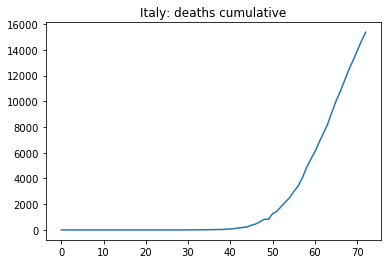

('Spain', 11947)


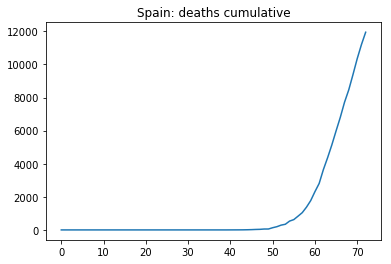

('US', 8407)


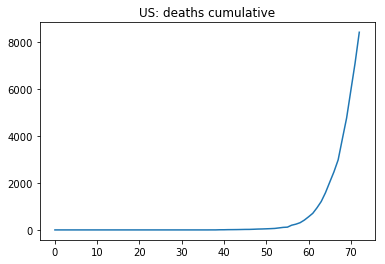

('France', 7574)


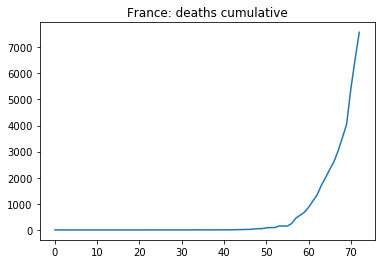

('United Kingdom', 4320)


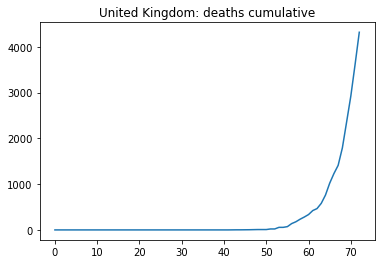

('Iran', 3452)


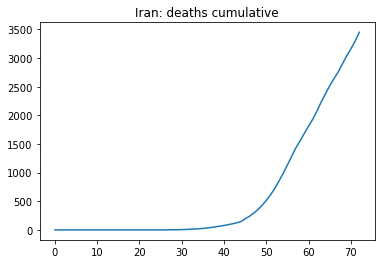

('China', 3330)


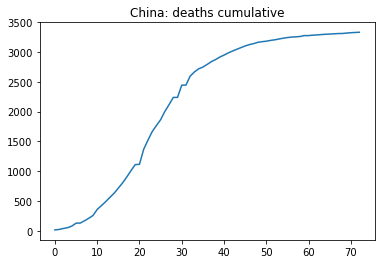

('Netherlands', 1656)


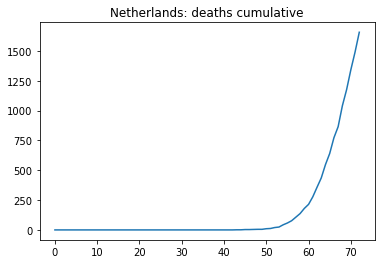

('Germany', 1444)


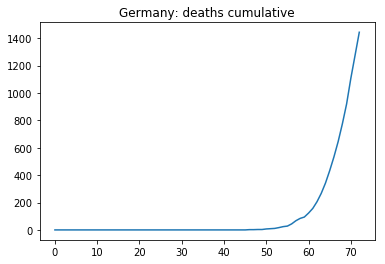

('Belgium', 1283)


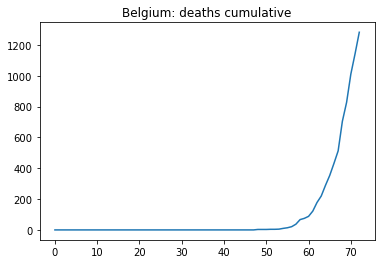

('Switzerland', 666)


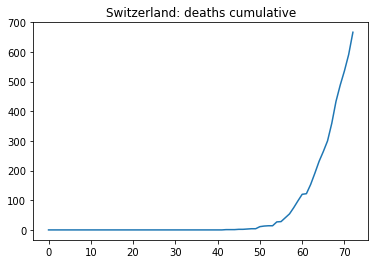

('Turkey', 501)


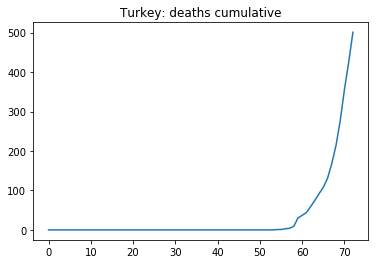

('Brazil', 445)


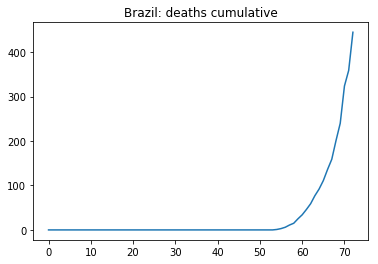

('Sweden', 373)


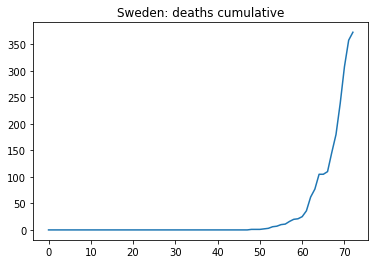

('Portugal', 266)


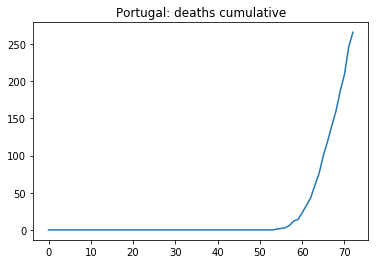

('Canada', 218)


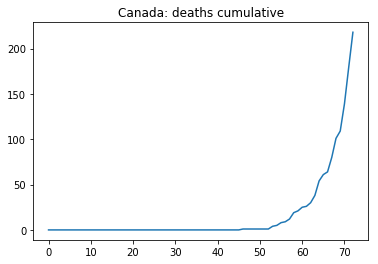

('Indonesia', 191)


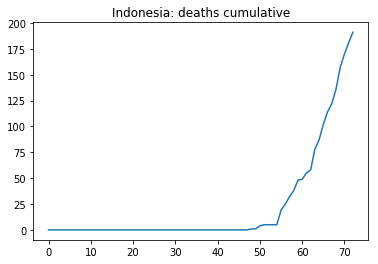

('Austria', 186)


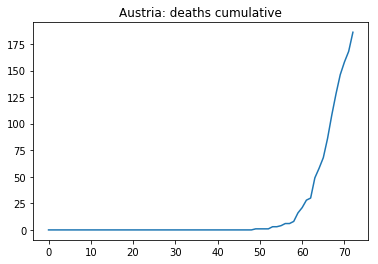

('Korea, South', 177)


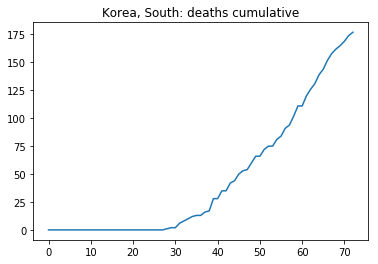

('Ecuador', 172)


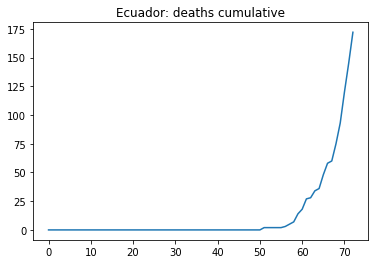

('Denmark', 161)


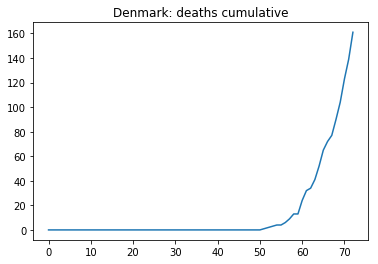

('Romania', 146)


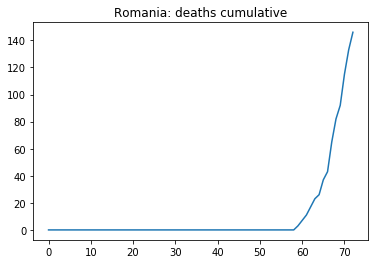

('Philippines', 144)


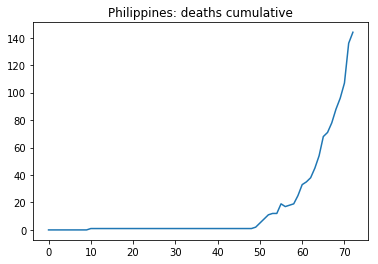

('Ireland', 137)


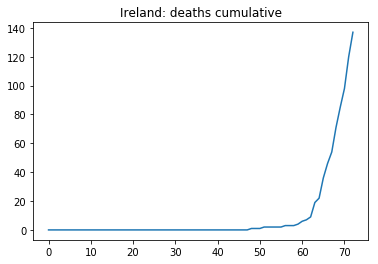

('Algeria', 130)


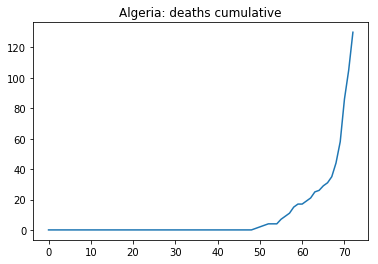

('India', 86)


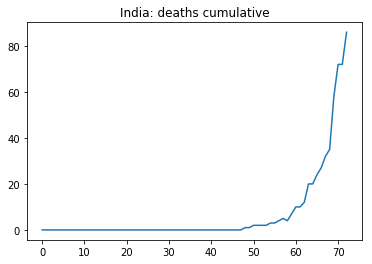

('Poland', 79)


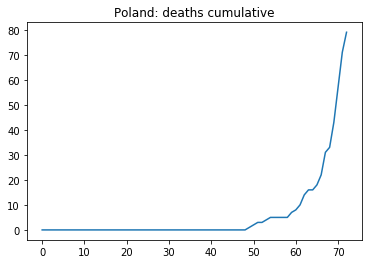

('Japan', 77)


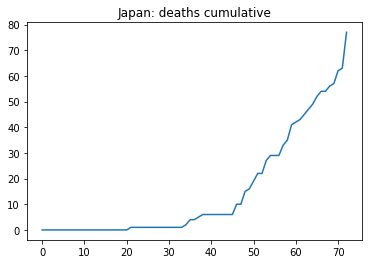

('Peru', 73)


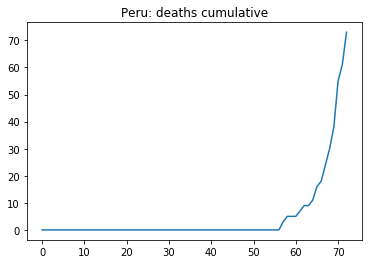

('Egypt', 71)


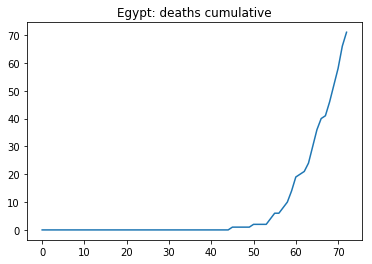

('Dominican Republic', 68)


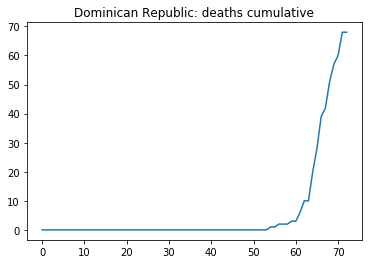

('Greece', 68)


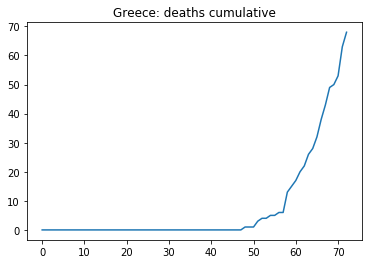

('Norway', 62)


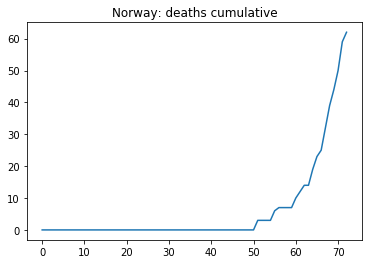

('Mexico', 60)


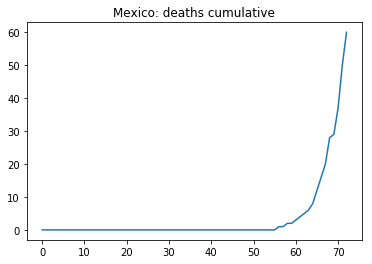

('Czechia', 59)


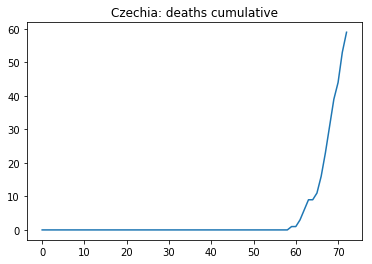

('Morocco', 59)


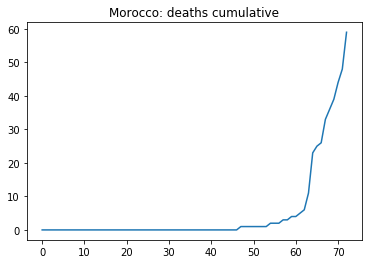

('Malaysia', 57)


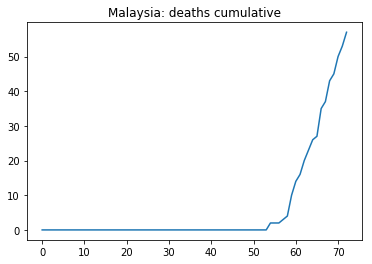

('Iraq', 56)


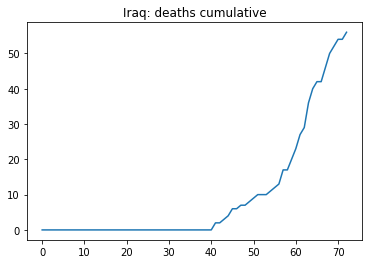

('Israel', 44)


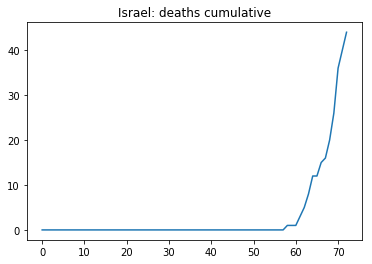

('Serbia', 44)


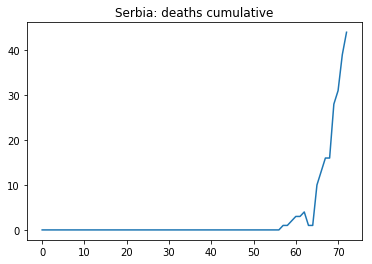

('Argentina', 43)


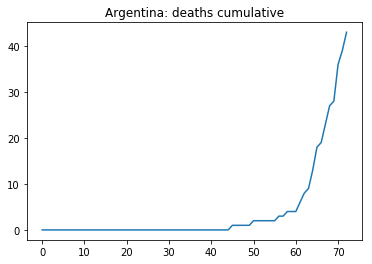

('Russia', 43)


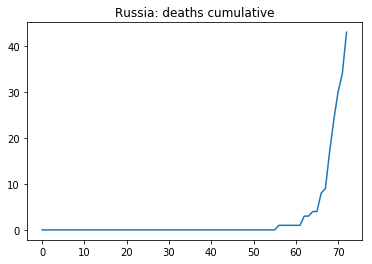

('Pakistan', 41)


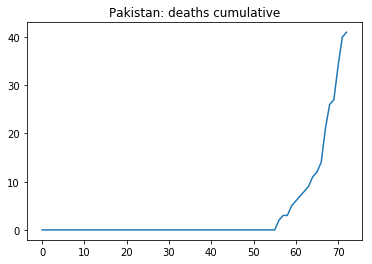

('Panama', 41)


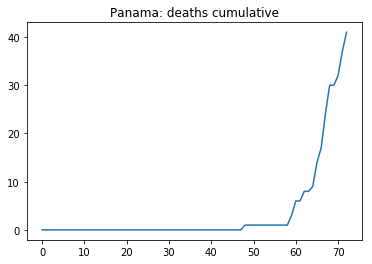

('Colombia', 32)


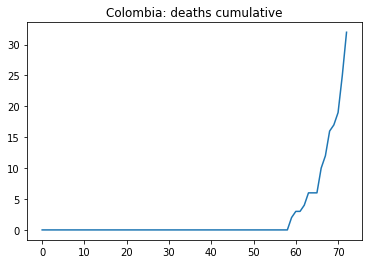

('Hungary', 32)


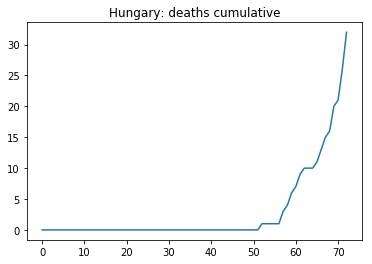

('San Marino', 32)


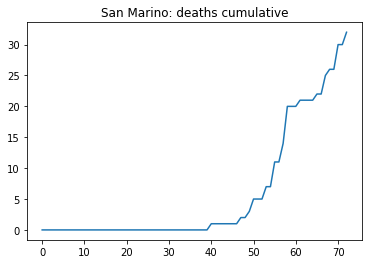

('Ukraine', 32)


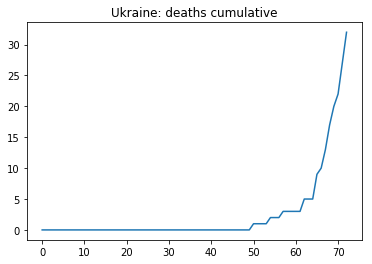

('Luxembourg', 31)


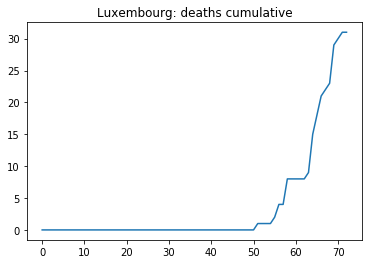

('Australia', 30)


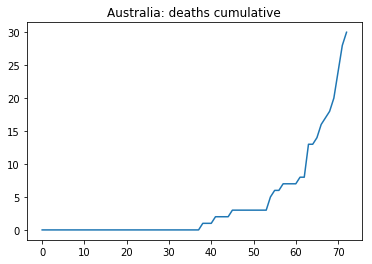

('Saudi Arabia', 29)


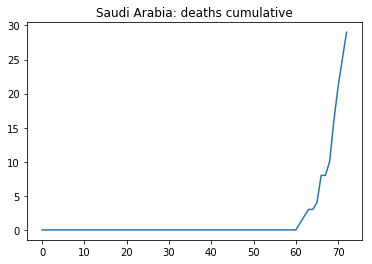

('Chile', 27)


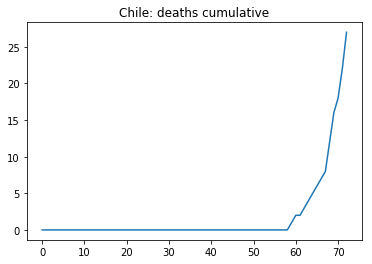

('Finland', 25)


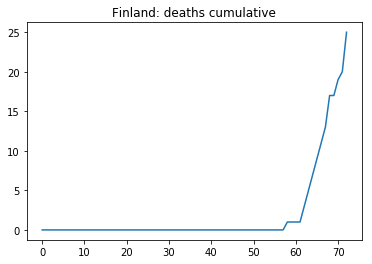

('Slovenia', 22)


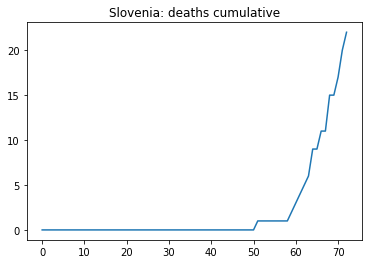

('Bosnia and Herzegovina', 21)


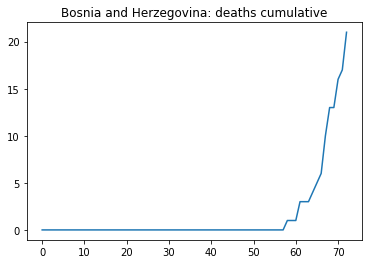

In [7]:
for country,total,curve in sorted(country_deaths, key=lambda x: x[1], reverse=True):
    if total>20:
        plt.figure()
        print(country,total)
        plt.title(country+": deaths cumulative")
        plt.plot(curve)
        plt.show()

In [8]:
#population dict
population_dict = {'Afghanistan':37172386,
                    'Albania':2866376,
                    'Algeria':42228429,
                    'Andorra':77006,
                    'Angola':30809762,
                    'Antigua and Barbuda':96286,
                    'Arab World':419790588,
                    'Argentina':44494502,
                    'Armenia':2951776,
                    'Aruba':105845,
                    'Australia':24992369,
                    'Austria':8847037,
                    'Azerbaijan':9942334,
                    'Bahamas':385640,
                    'Bahrain':1569439,
                    'Bangladesh':161356039,
                    'Barbados':286641,
                    'Belarus':9485386,
                    'Belgium':11422068,
                    'Belize':383071,
                    'Benin':11485048,
                    'Bermuda':63968,
                    'Bhutan':754394,
                    'Bolivia':11353142,
                    'Bosnia and Herzegovina':3323929,
                    'Botswana':2254126,
                    'Brazil':209469333,
                    'British Virgin Islands':29802,
                    'Brunei':428962,
                    'Bulgaria':7024216,
                    'Burkina Faso':19751535,
                    'Burma':53370000,
                    'Cabo Verde':543767,
                    'Cambodia':16249798,
                    'Cameroon':25216237,
                    'Canada':37058856,
                    'Caribbean small states':7358965,
                    'Cayman Islands':64174,
                    'Central African Republic':4666377,
                    'Central Europe and the Baltics':102511922,
                    'Chad':15477751,
                    'Channel Islands':170499,
                    'Chile':18729160,
                    'China':1392730000,
                    'Colombia':49648685,
                    'Comoros':832322,
                    'Congo (Brazzaville)':84068091,
                    'Congo (Kinshasa)':5244363,
                    'Costa Rica':4999441,
                    'Cote d\'Ivoire':25069229,
                    'Croatia':4089400,
                    'Cuba':11338138,
                    'Curacao':159849,
                    'Cyprus':1189265,
                    'Czechia':10625695,
                    'Denmark':5797446,
                    'Djibouti':958920,
                    'Dominica':71625,
                    'Dominican Republic':10627165,
                    'Early-demographic dividend':3249140605,
                    'East Asia & Pacific':2328220870,
                    'East Asia & Pacific (excluding high income)':2081651801,
                    'East Asia & Pacific (IDA & IBRD countries)':2056064424,
                    'Ecuador':17084357,
                    'Egypt':98423595,
                    'El Salvador':6420744,
                    'Equatorial Guinea':1308974,
                    'Eritrea':4475000,
                    'Estonia':1320884,
                    'Eswatini':1136191,
                    'Ethiopia':109224559,
                    'Euro area':341783171,
                    'European Union':513213363,
                    'Faroe Islands':48497,
                    'Fiji':883483,
                    'Finland':5518050,
                    'France':66987244,
                    'French Polynesia':277679,
                    'Gabon':2119275,
                    'Gambia':2280102,
                    'Georgia':3731000,
                    'Germany':82927922,
                    'Ghana':29767108,
                    'Gibraltar':33718,
                    'Greece':10727668,
                    'Greenland':56025,
                    'Grenada':111454,
                    'Guam':165768,
                    'Guatemala':17247807,
                    'Guinea':12414318,
                    'Guinea-Bissau':1874309,
                    'Guyana':779004,
                    'Haiti':11123176,
                    'Holy See':1000,
                    'Honduras':9587522,
                    'Hong Kong SAR, China':7451000,
                    'Hungary':9768785,
                    'Iceland':353574,
                    'India':1352617328,
                    'Indonesia':267663435,
                    'Iran':81800269,
                    'Iraq':38433600,
                    'Ireland':4853506,
                    'Isle of Man':84077,
                    'Israel':8883800,
                    'Italy':60431283,
                    'Jamaica':2934855,
                    'Japan':126529100,
                    'Jordan':9956011,
                    'Kazakhstan':18276499,
                    'Kenya':51393010,
                    'Kiribati':115847,
                    'Korea, South':25549819,
                    'Korea, Rep.':51635256,
                    'Kosovo':1845300,
                    'Kuwait':4137309,
                    'Kyrgyzstan':6315800,
                    'Laos':7061507,
                    'Latvia':1926542,
                    'Lebanon':6848925,
                    'Lesotho':2108132,
                    'Liberia':4818977,
                    'Libya':6678567,
                    'Liechtenstein':37910,
                    'Lithuania':2789533,
                    'Luxembourg':607728,
                    'Macao SAR, China':631636,
                    'Madagascar':26262368,
                    'Malawi':18143315,
                    'Malaysia':31528585,
                    'Maldives':515696,
                    'Mali':19077690,
                    'Malta':483530,
                    'Marshall Islands':58413,
                    'Mauritania':4403319,
                    'Mauritius':1265303,
                    'Mexico':126190788,
                    'Micronesia, Fed. Sts.':112640,
                    'Moldova':3545883,
                    'Monaco':38682,
                    'Mongolia':3170208,
                    'Montenegro':622345,
                    'Morocco':36029138,
                    'Mozambique':29495962,
                    'Myanmar':53708395,
                    'Namibia':2448255,
                    'Nauru':12704,
                    'Nepal':28087871,
                    'Netherlands':17231017,
                    'New Caledonia':284060,
                    'New Zealand':4885500,
                    'Nicaragua':6465513,
                    'Niger':22442948,
                    'Nigeria':195874740,
                    'North America':364290258,
                    'North Macedonia':2082958,
                    'Northern Mariana Islands':56882,
                    'Norway':5314336,
                    'Oman':4829483,
                    'Pakistan':212215030,
                    'Palau':17907,
                    'Panama':4176873,
                    'Papua New Guinea':8606316,
                    'Paraguay':6956071,
                    'Peru':31989256,
                    'Philippines':106651922,
                    'Poland':37978548,
                    'Portugal':10281762,
                    'Puerto Rico':3195153,
                    'Qatar':2781677,
                    'Romania':19473936,
                    'Russia':144478050,
                    'Rwanda':12301939,
                    'Saint Kitts and Nevis':55000,
                    'Saint Lucia':180000,
                    'Saint Vincent and the Grenadines':110000,
                    'San Marino':33785,
                    'Sao Tome and Principe':211028,
                    'Saudi Arabia':33699947,
                    'Senegal':15854360,
                    'Serbia':6982084,
                    'Seychelles':96762,
                    'Sierra Leone':7650154,
                    'Singapore':5638676,
                    'Sint Maarten (Dutch part)':40654,
                    'Slovakia':5447011,
                    'Slovenia':2067372,
                    'Small states':40575321,
                    'Solomon Islands':652858,
                    'Somalia':15008154,
                    'South Africa':57779622,
                    'South Asia':1814388744,
                    'South Asia (IDA & IBRD)':1814388744,
                    'South Sudan':10975920,
                    'Spain':46723749,
                    'Sri Lanka':21670000,
                    'St. Kitts and Nevis':52441,
                    'St. Lucia':181889,
                    'St. Martin (French part)':37264,
                    'St. Vincent and the Grenadines':110210,
                    'Sub-Saharan Africa':1078306520,
                    'Sudan':41801533,
                    'Suriname':575991,
                    'Sweden':10183175,
                    'Switzerland':8516543,
                    'Syria':16906283,
                    'Taiwan*':23780000,
                    'Tajikistan':9100837,
                    'Tanzania':56318348,
                    'Thailand':69428524,
                    'Timor-Leste':1267972,
                    'Togo':7889094,
                    'Tonga':103197,
                    'Trinidad and Tobago':1389858,
                    'Tunisia':11565204,
                    'Turkey':82319724,
                    'Turkmenistan':5850908,
                    'Turks and Caicos Islands':37665,
                    'Tuvalu':11508,
                    'Uganda':42723139,
                    'Ukraine':44622516,
                    'United Arab Emirates':9630959,
                    'United Kingdom':66488991,
                    'US':327167434,
                    'Uruguay':3449299,
                    'Uzbekistan':32955400,
                    'Vanuatu':292680,
                    'Venezuela':28870195,
                    'Vietnam':95540395,
                    'Virgin Islands (U.S.)':106977,
                    'West Bank and Gaza':4569087,
                    'World':7594270356,
                    'Yemen, Rep.':28498687,
                    'Zambia':17351822,
                    'Zimbabwe':14439018}

# See how many deaths in each country so far with a sigmoid curve fitted to the data

('error:', 0.01, 0.0, 101.11111111111111, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 79.44444444444444, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 115.55555555555556, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 122.77777777777777, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 130.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 108.33333333333334, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is 

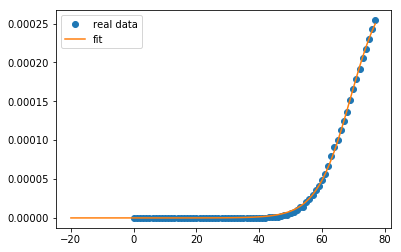

best error 3.7807622881260634e-05


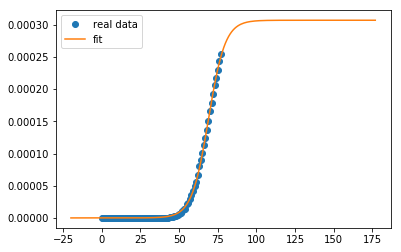

('Italy: predicted dead: ', 18544.86382337539, ' currently at:', 15362.0)


/Users/francoischaubard/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


('error:', 0.01, 0.0, 72.22222222222223, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.01, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 72.22222222222223, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 79.44444444444444, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 86.66666666666667, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceede

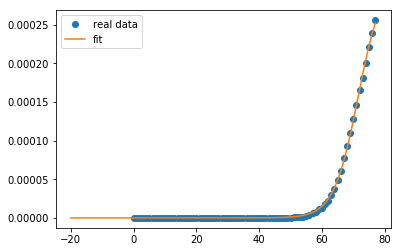

best error 2.744547025021247e-05


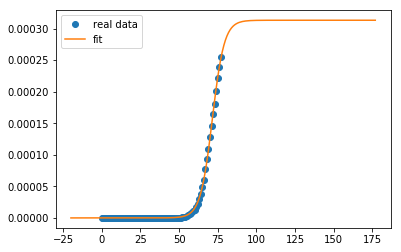

('Spain: predicted dead: ', 14633.93640555446, ' currently at:', 11947.0)
best error 1.7846567789732044e-06


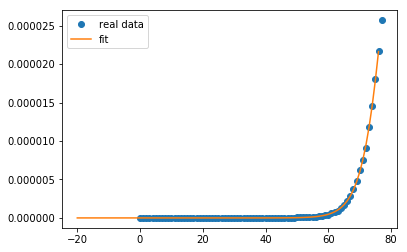

best error 1.7846567789732044e-06


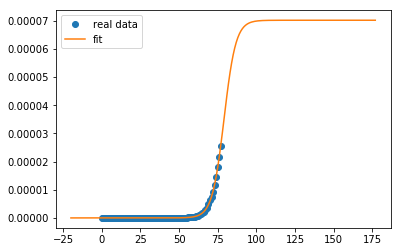

('US: predicted dead: ', 22961.36451795981, ' currently at:', 8407.0)
best error 8.816289671036788e-06


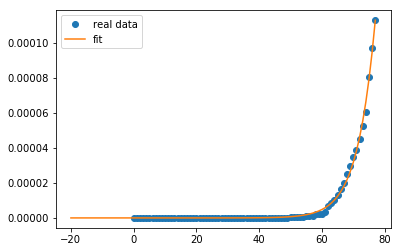

best error 8.816289671036788e-06


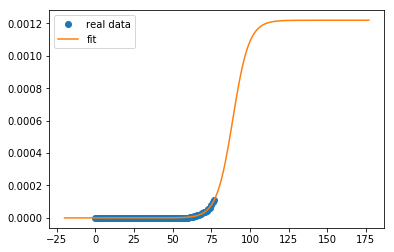

('France: predicted dead: ', 81656.24392935232, ' currently at:', 7574.0)
('error:', 0.0001, 0.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 72.22222222222223, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 79.44444444444444, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 86.66666666666667, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 108.33333333333334, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 115.55555555555556, RuntimeError

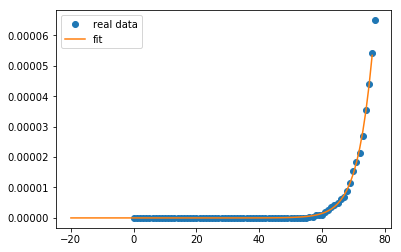

best error 4.420201486319822e-06


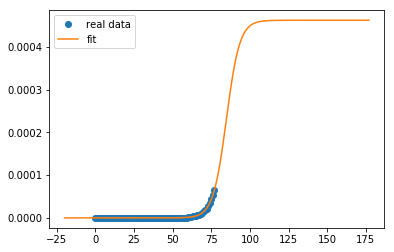

('United Kingdom: predicted dead: ', 30733.474577226865, ' currently at:', 4320.0)
best error 7.61048198611927e-06


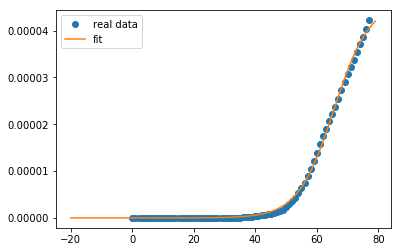

best error 7.61048198611927e-06


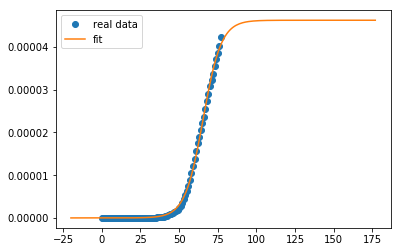

('Iran: predicted dead: ', 3782.1547343620123, ' currently at:', 3452.0)
best error 1.502832188352524e-06


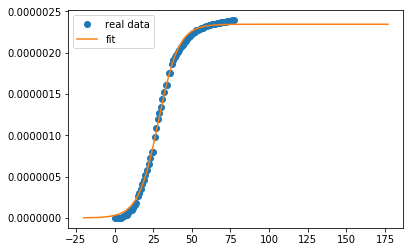

best error 1.502832188352524e-06


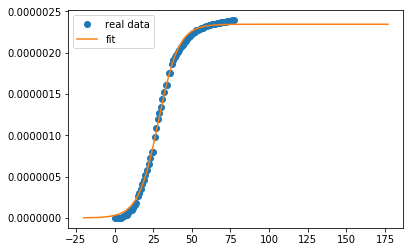

('China: predicted dead: ', 3262.7287019047785, ' currently at:', 3330.0)
('error:', 0.001, 0.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
best error 8.780830033360617e-06


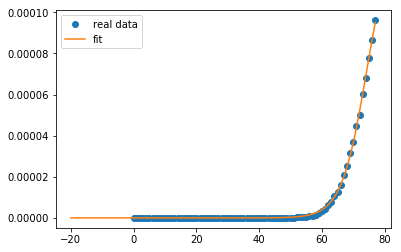

best error 8.780830033360617e-06


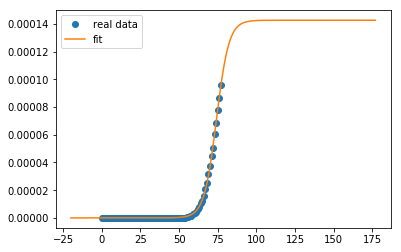

('Netherlands: predicted dead: ', 2458.29451985385, ' currently at:', 1656.0)
best error 1.3680237691359568e-06


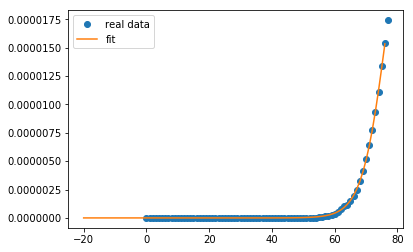

best error 1.3680237691359568e-06


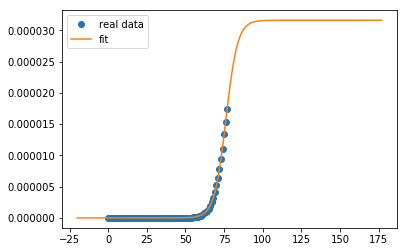

('Germany: predicted dead: ', 2620.996942335373, ' currently at:', 1444.0)


/Users/francoischaubard/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:768: RuntimeWarning: divide by zero encountered in true_divide
  pcov = np.dot(VT.T / s**2, VT)


best error 8.536107471956916e-06


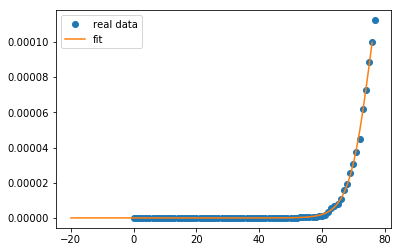

best error 8.536107471956916e-06


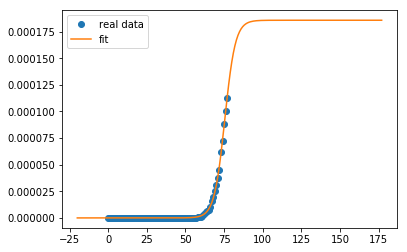

('Belgium: predicted dead: ', 2121.6035321379845, ' currently at:', 1283.0)
('error:', 0.0001, 2.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
best error 7.488521550290262e-06


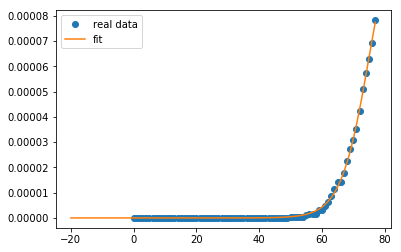

best error 7.488521550290262e-06


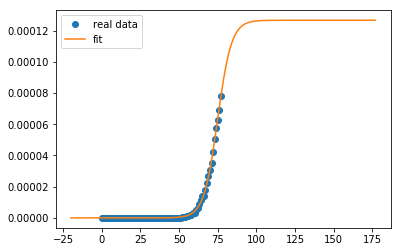

('Switzerland: predicted dead: ', 1078.2148962802867, ' currently at:', 666.0)
best error 4.0519163011157253e-07


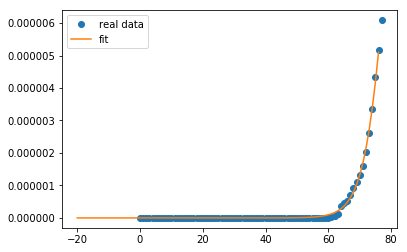

best error 4.0519163011157253e-07


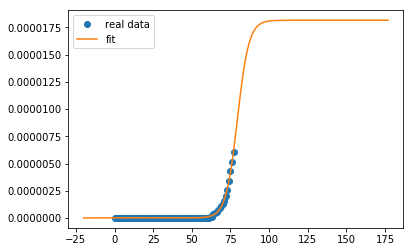

('Turkey: predicted dead: ', 1495.3834515478761, ' currently at:', 501.0)
best error 1.472392393742806e-07


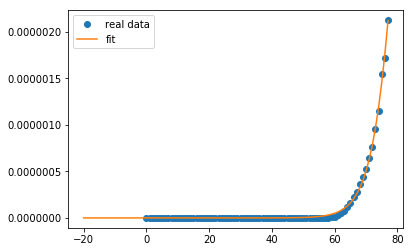

best error 1.472392393742806e-07


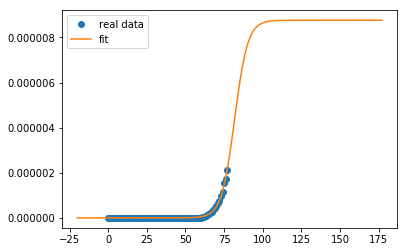

('Brazil: predicted dead: ', 1835.5273801658645, ' currently at:', 445.0)
best error 2.872385086183828e-06


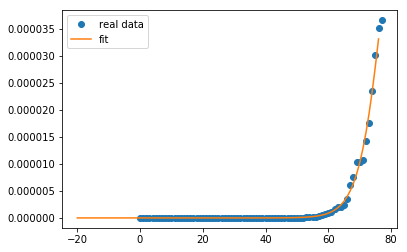

best error 2.872385086183828e-06


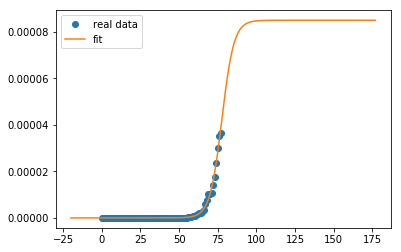

('Sweden: predicted dead: ', 865.7876856991376, ' currently at:', 373.0)
best error 2.175543554950171e-06


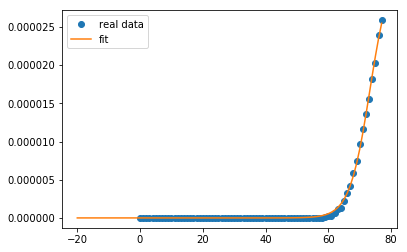

best error 2.175543554950171e-06


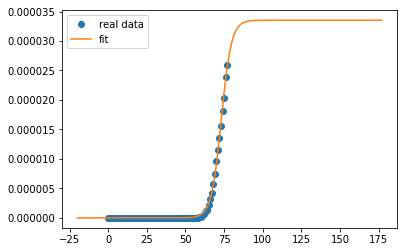

('Portugal: predicted dead: ', 344.6286362630479, ' currently at:', 266.0)
best error 4.2926027551530743e-07


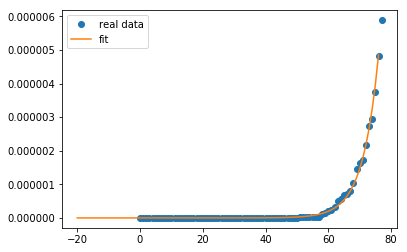

best error 4.2926027551530743e-07


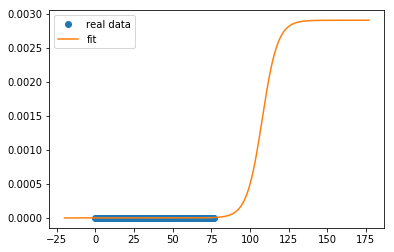

('Canada: predicted dead: ', 107629.94515336702, ' currently at:', 218.0)
best error 8.297930688885267e-08


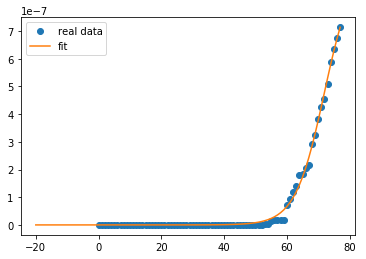

best error 8.297930688885267e-08


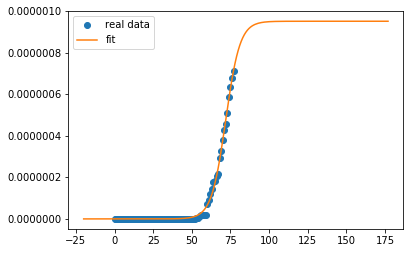

('Indonesia: predicted dead: ', 254.55977506687748, ' currently at:', 191.0)
best error 1.90964916752414e-06


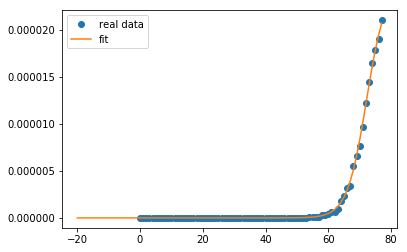

best error 1.90964916752414e-06


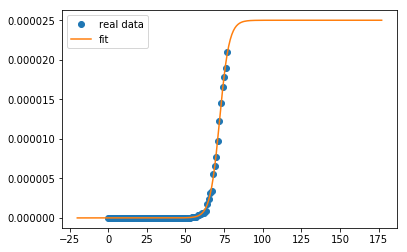

('Austria: predicted dead: ', 221.1040568502903, ' currently at:', 186.0)
best error 1.7375753950392082e-06


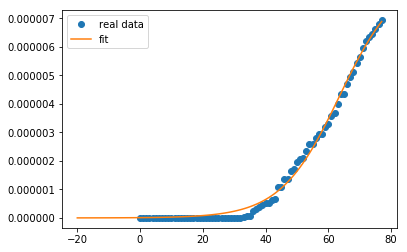

best error 1.7375753950392082e-06


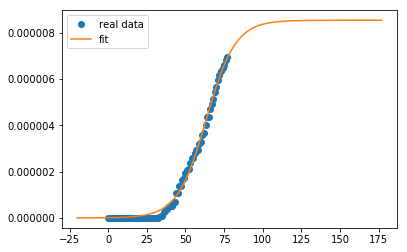

('Korea, South: predicted dead: ', 217.9339225791003, ' currently at:', 177.0)
best error 7.339739906050034e-07


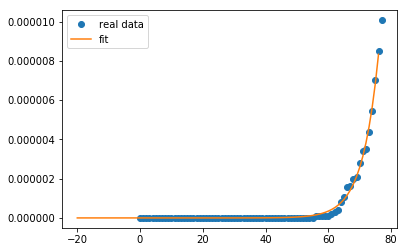

best error 7.339739906050034e-07


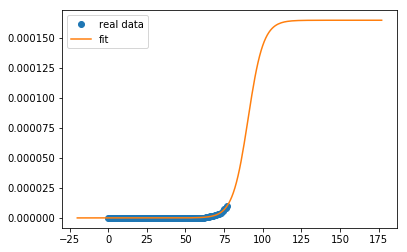

('Ecuador: predicted dead: ', 2813.5744891177205, ' currently at:', 172.0)
best error 2.4262044827470946e-06


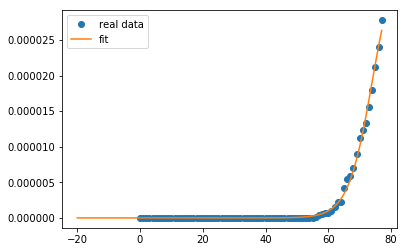

best error 2.4262044827470946e-06


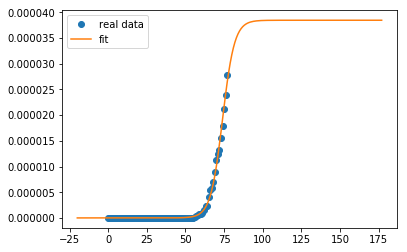

('Denmark: predicted dead: ', 223.03054021531915, ' currently at:', 161.0)
best error 5.405335515878087e-07


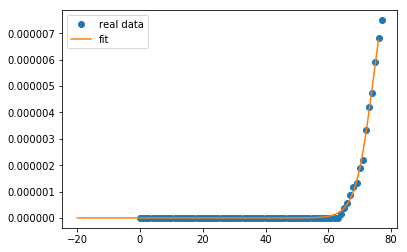

best error 5.405335515878087e-07


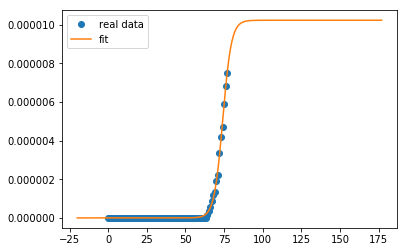

('Romania: predicted dead: ', 199.36773250057297, ' currently at:', 146.0)
best error 1.4557933413964808e-07


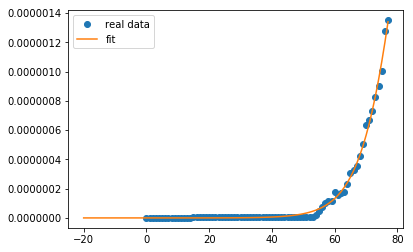

best error 1.4557933413964808e-07


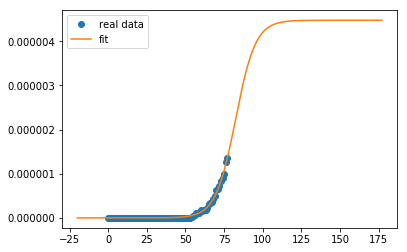

('Philippines: predicted dead: ', 477.49855930255416, ' currently at:', 144.0)
best error 1.9953020612966766e-06


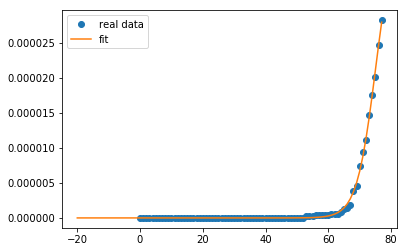

best error 1.9953020612966766e-06


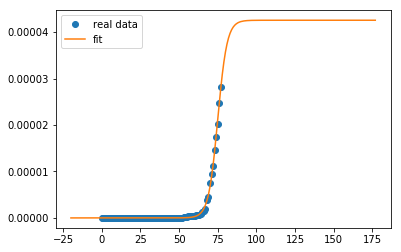

('Ireland: predicted dead: ', 206.45482972117108, ' currently at:', 137.0)
best error 2.1904674692018498e-07


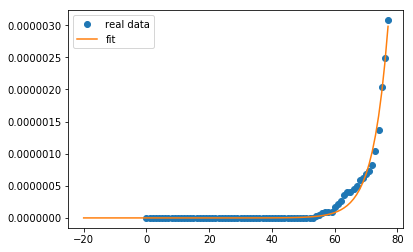

best error 2.1904674692018498e-07


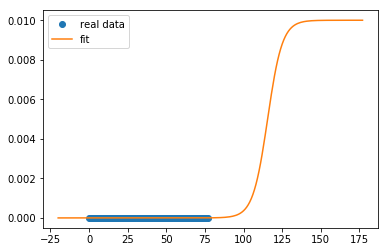

('Algeria: predicted dead: ', 422283.2720822552, ' currently at:', 130.0)


In [9]:
from scipy.optimize import curve_fit
# Since we have the most data on China, lets learn a function and then use it to predict what will happen for other countries with a "draconian" factor of (5-10x or so)
def fsigmoid(x, *params):
    return params[0] * 1.0 / (1.0 + np.exp(-params[1]*(x-params[2])))

def fit_sigmoid(data, plot=True, max_days_to_predict_from_today=40):
    best_error=1.
    offset=20
    best_predictions=None
    data = np.hstack([np.zeros((5)),data])
    days = range(len(data))
    x = range(-offset, len(data)+max_days_to_predict_from_today)
    for p0 in [1e-1,1e-2,1e-3,1e-4,1e-5]:
        for p1 in np.linspace(0,2,20):
            for p2 in np.linspace(65,130,10):
                try:
                    popt,pcov = curve_fit(fsigmoid, days, data, p0=[p0,p1,p2], method='dogbox', bounds=([-10., -10.,-1000.],[10., 10.,1000.]))

                except Exception as e:
                    print("error:",p0,p1,p2,e)
                   
                residuals = data - fsigmoid(days,*popt)
                error = np.sum((np.abs(residuals)/(residuals.size-2)))
                
                if best_error>error:
                    y = fsigmoid(x, *popt)
                    best_error=error
                    best_predictions=y

    if plot:
        print "best error",error
        plt.figure()
        
        plt.plot(days, list(data), 'o', label='real data')
        
        m = np.max(data)
        bb = list(best_predictions[best_predictions<m])
        
        plt.plot(x[:len(bb)], bb, label='fit')
        plt.legend(loc='best')
        plt.show()
        
        print "best error",error
        plt.figure()
        plt.plot(days, list(data), 'o', label='real data')
        plt.plot(x,best_predictions, label='fit')
        plt.legend(loc='best')
        plt.show()
        
    return best_predictions[-max_days_to_predict_from_today:],best_error


for country,total,curve in sorted(country_deaths, key=lambda x: x[1], reverse=True):
    if total>100:
        if country in population_dict:
            population=population_dict[country]
            dates = country_stats.columns[4:]
            country_stats = df_gb.loc[df_gb["Country/Region"] == country]
            data = country_stats.values[:,4:][0].astype('float')/population
            prediction, error = fit_sigmoid(data,plot=True,max_days_to_predict_from_today=100)
            print(country+": predicted dead: ", max(prediction)*population, " currently at:",max(data)*population)
            print("="*50)

# Make a Global Prediction using Naive Curve Fitting to a Sigmoid

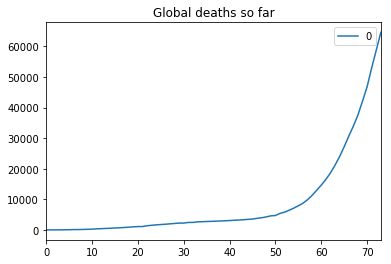

In [11]:
global_stats = df_gb.sum(axis=0)
df_global = global_stats[3:].reset_index()
df_global.plot(title="Global deaths so far")

('Globabl Deaths by', '4/4/20')
best error 1.1238513733038303e-06


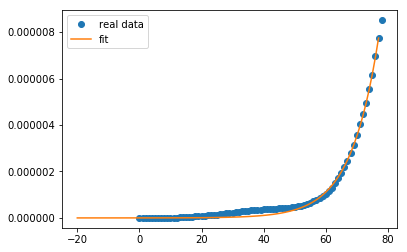

best error 1.1238513733038303e-06


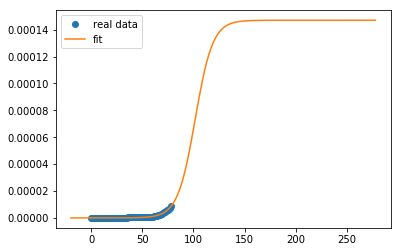

('predicted dead: ', 1116439.5209985657, ' currently at:', 64605.99999999999)
This simple, naive model suggests that 1116439 will die globally in 200 days from 4/4/20
WARNING! THIS IS A VERY NAIVE PREDICTION.


In [12]:
from scipy.optimize import curve_fit
global_stats = df_gb.sum(axis=0)
df_global = global_stats[3:].reset_index()
dates = list(df_global["index"])
global_data = df_global[0]
population=population_dict["World"]
data = global_data.astype('float')/population
print("Globabl Deaths by",dates[-1])
max_days_to_predict_from_today = 200
prediction, error = fit_sigmoid(data,plot=True,max_days_to_predict_from_today=max_days_to_predict_from_today)
print("predicted dead: ", max(prediction)*population, " currently at:",max(data)*population)

print("This simple, naive model suggests that "+str(int(max(prediction)*population)) + " will die globally in "+ str(max_days_to_predict_from_today)+" days from "+str(dates[-1]))
print("WARNING! THIS IS A VERY NAIVE PREDICTION.")


In [32]:
#assume that it will effect each country uniformly as per population
prediction_df = pd.DataFrame(columns=['Date', 'Deaths', 'Place'])
prediction_dates = pd.date_range(start = dates[-1], periods = max_days_to_predict_from_today) 
counter=0
for day in prediction_dates:
    global_prediction = int(prediction[counter]*population_dict["World"])
    date = day.date()
    print "Predicted deaths globally (day,count)",date,global_prediction
    prediction_df = prediction_df.append({'Date': date, 'Deaths': global_prediction, 'Place': "World"}, ignore_index=True)
    for country in list(df_gb["Country/Region"]):
        #check if we have the population for it
        if country in population_dict: 
            population = population_dict[country]
            perc_of_world_population = float(population)/population_dict["World"]
            local_prediction = int(global_prediction*perc_of_world_population)
            # add to prediction_df
            prediction_df = prediction_df.append({'Date': date, 'Deaths': local_prediction, 'Place': country}, ignore_index=True)
    counter+=1


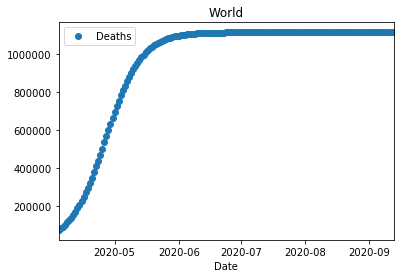

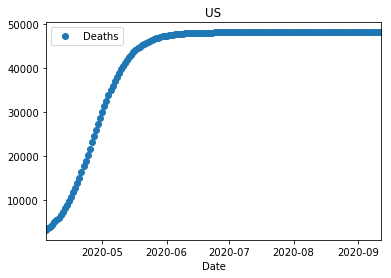

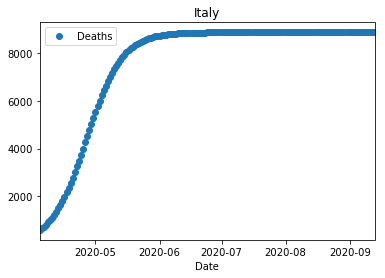

In [15]:
# see your predictions
prediction_df[prediction_df["Place"]=="World"].plot(x='Date', y='Deaths', style='o',title="World")
prediction_df[prediction_df["Place"]=="US"].plot(x='Date', y='Deaths', style='o',title="US")
prediction_df[prediction_df["Place"]=="Italy"].plot(x='Date', y='Deaths', style='o',title="Italy")

# Package our predictions up and submit to covidpredictions.com

In [31]:
submit_df = prediction_df.copy()
submit_df = submit_df.set_index("Place")
submit_df = submit_df.pivot_table(index="Place",columns="Date",values=['Deaths'], aggfunc='first')
submit_df.columns = submit_df.columns.droplevel(level=0)
submit_df.to_csv(os.path.join(COVID_REPO_PATH,"predictions.csv"),index=True)

# Now upload it to covidpredictions.com via the submit form on the website and your predictions will be scored each day starting in 7 days, and if they make the top 10, they will be added to the leaderboard

In [ ]:
############################################
# predictions.csv should be in the format:
############################################
# Place          4/4/20    4/5/20    4/6/20    4/7/20    4/8/20    4/9/20    4/10/20 ... until end of your pred
# Afghanistan    358       399       445       495       550       611       678
# Albania        27        30        34        38        42        47        62
# World          545       676       878       495       550       611       678
# Alabama        27        30        34        38        42        47        62
# Alabama_Autauga 0        0          0         0         3         5         8


# Here are all the places we will run scores for:

In [ ]:

Afghanistan
Alabama
Alabama_Autauga
Alabama_Baldwin
Alabama_Barbour
Alabama_Bibb
Alabama_Blount
Alabama_Bullock
Alabama_Butler
Alabama_Calhoun
Alabama_Chambers
Alabama_Cherokee
Alabama_Chilton
Alabama_Choctaw
Alabama_Clarke
Alabama_Clay
Alabama_Cleburne
Alabama_Coffee
Alabama_Colbert
Alabama_Conecuh
Alabama_Coosa
Alabama_Covington
Alabama_Crenshaw
Alabama_Cullman
Alabama_Dale
Alabama_Dallas
Alabama_DeKalb
Alabama_Elmore
Alabama_Escambia
Alabama_Etowah
Alabama_Fayette
Alabama_Franklin
Alabama_Greene
Alabama_Hale
Alabama_Henry
Alabama_Houston
Alabama_Jackson
Alabama_Jefferson
Alabama_Lamar
Alabama_Lauderdale
Alabama_Lawrence
Alabama_Lee
Alabama_Limestone
Alabama_Lowndes
Alabama_Macon
Alabama_Madison
Alabama_Marengo
Alabama_Marion
Alabama_Marshall
Alabama_Mobile
Alabama_Monroe
Alabama_Montgomery
Alabama_Morgan
Alabama_Pickens
Alabama_Pike
Alabama_Randolph
Alabama_Russell
Alabama_Shelby
Alabama_St. Clair
Alabama_Sumter
Alabama_Talladega
Alabama_Tallapoosa
Alabama_Tuscaloosa
Alabama_Walker
Alabama_Washington
Alabama_Wilcox
Alabama_Winston
Alaska
Alaska_Anchorage
Alaska_Fairbanks North Star Borough
Alaska_Juneau City and Borough
Alaska_Kenai Peninsula Borough
Alaska_Ketchikan Gateway Borough
Alaska_Matanuska-Susitna Borough
Alaska_Southeast Fairbanks Census Area
Alaska_Unknown
Alaska_Yukon-Koyukuk Census Area
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Arizona
Arizona_Apache
Arizona_Cochise
Arizona_Coconino
Arizona_Gila
Arizona_Graham
Arizona_Greenlee
Arizona_La Paz
Arizona_Maricopa
Arizona_Mohave
Arizona_Navajo
Arizona_Pima
Arizona_Pinal
Arizona_Santa Cruz
Arizona_Unknown
Arizona_Yavapai
Arizona_Yuma
Arkansas
Arkansas_Arkansas
Arkansas_Ashley
Arkansas_Baxter
Arkansas_Benton
Arkansas_Boone
Arkansas_Bradley
Arkansas_Carroll
Arkansas_Chicot
Arkansas_Clark
Arkansas_Cleburne
Arkansas_Cleveland
Arkansas_Columbia
Arkansas_Conway
Arkansas_Craighead
Arkansas_Crawford
Arkansas_Crittenden
Arkansas_Cross
Arkansas_Desha
Arkansas_Drew
Arkansas_Faulkner
Arkansas_Garland
Arkansas_Grant
Arkansas_Greene
Arkansas_Hempstead
Arkansas_Hot Spring
Arkansas_Howard
Arkansas_Independence
Arkansas_Jefferson
Arkansas_Johnson
Arkansas_Lafayette
Arkansas_Lawrence
Arkansas_Lee
Arkansas_Lincoln
Arkansas_Lonoke
Arkansas_Miller
Arkansas_Mississippi
Arkansas_Monroe
Arkansas_Nevada
Arkansas_Newton
Arkansas_Ouachita
Arkansas_Perry
Arkansas_Pike
Arkansas_Poinsett
Arkansas_Polk
Arkansas_Pope
Arkansas_Prairie
Arkansas_Pulaski
Arkansas_Randolph
Arkansas_Saline
Arkansas_Scott
Arkansas_Searcy
Arkansas_Sebastian
Arkansas_Sevier
Arkansas_Sharp
Arkansas_St. Francis
Arkansas_Stone
Arkansas_Union
Arkansas_Unknown
Arkansas_Van Buren
Arkansas_Washington
Arkansas_White
Arkansas_Woodruff
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
California
California_Alameda
California_Alpine
California_Amador
California_Butte
California_Calaveras
California_Colusa
California_Contra Costa
California_Del Norte
California_El Dorado
California_Fresno
California_Glenn
California_Humboldt
California_Imperial
California_Inyo
California_Kern
California_Kings
California_Los Angeles
California_Madera
California_Marin
California_Mendocino
California_Merced
California_Mono
California_Monterey
California_Napa
California_Nevada
California_Orange
California_Placer
California_Plumas
California_Riverside
California_Sacramento
California_San Benito
California_San Bernardino
California_San Diego
California_San Francisco
California_San Joaquin
California_San Luis Obispo
California_San Mateo
California_Santa Barbara
California_Santa Clara
California_Santa Cruz
California_Shasta
California_Siskiyou
California_Solano
California_Sonoma
California_Stanislaus
California_Sutter
California_Tehama
California_Tulare
California_Tuolumne
California_Unknown
California_Ventura
California_Yolo
California_Yuba
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Colorado
Colorado_Adams
Colorado_Alamosa
Colorado_Arapahoe
Colorado_Archuleta
Colorado_Baca
Colorado_Boulder
Colorado_Broomfield
Colorado_Chaffee
Colorado_Clear Creek
Colorado_Costilla
Colorado_Crowley
Colorado_Custer
Colorado_Delta
Colorado_Denver
Colorado_Douglas
Colorado_Eagle
Colorado_El Paso
Colorado_Elbert
Colorado_Fremont
Colorado_Garfield
Colorado_Grand
Colorado_Gunnison
Colorado_Hinsdale
Colorado_Huerfano
Colorado_Jefferson
Colorado_Kit Carson
Colorado_La Plata
Colorado_Lake
Colorado_Larimer
Colorado_Las Animas
Colorado_Lincoln
Colorado_Logan
Colorado_Mesa
Colorado_Mineral
Colorado_Moffat
Colorado_Montezuma
Colorado_Montrose
Colorado_Morgan
Colorado_Otero
Colorado_Park
Colorado_Phillips
Colorado_Pitkin
Colorado_Pueblo
Colorado_Rio Blanco
Colorado_Rio Grande
Colorado_Routt
Colorado_Saguache
Colorado_San Miguel
Colorado_Summit
Colorado_Teller
Colorado_Unknown
Colorado_Washington
Colorado_Weld
Colorado_Yuma
Congo (Brazzaville)
Congo (Kinshasa)
Connecticut
Connecticut_Fairfield
Connecticut_Hartford
Connecticut_Litchfield
Connecticut_Middlesex
Connecticut_New Haven
Connecticut_New London
Connecticut_Tolland
Connecticut_Unknown
Connecticut_Windham
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Delaware
Delaware_Kent
Delaware_New Castle
Delaware_Sussex
Denmark
Diamond Princess
District of Columbia
District of Columbia_District of Columbia
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
Florida
Florida_Alachua
Florida_Baker
Florida_Bay
Florida_Bradford
Florida_Brevard
Florida_Broward
Florida_Calhoun
Florida_Charlotte
Florida_Citrus
Florida_Clay
Florida_Collier
Florida_Columbia
Florida_DeSoto
Florida_Duval
Florida_Escambia
Florida_Flagler
Florida_Franklin
Florida_Gadsden
Florida_Glades
Florida_Gulf
Florida_Hardee
Florida_Hendry
Florida_Hernando
Florida_Highlands
Florida_Hillsborough
Florida_Holmes
Florida_Indian River
Florida_Jackson
Florida_Lake
Florida_Lee
Florida_Leon
Florida_Levy
Florida_Madison
Florida_Manatee
Florida_Marion
Florida_Martin
Florida_Miami-Dade
Florida_Monroe
Florida_Nassau
Florida_Okaloosa
Florida_Okeechobee
Florida_Orange
Florida_Osceola
Florida_Palm Beach
Florida_Pasco
Florida_Pinellas
Florida_Polk
Florida_Putnam
Florida_Santa Rosa
Florida_Sarasota
Florida_Seminole
Florida_St. Johns
Florida_St. Lucie
Florida_Sumter
Florida_Suwannee
Florida_Union
Florida_Unknown
Florida_Volusia
Florida_Wakulla
Florida_Walton
Florida_Washington
France
Gabon
Gambia
Georgia
Georgia
Georgia_Appling
Georgia_Bacon
Georgia_Baker
Georgia_Baldwin
Georgia_Banks
Georgia_Barrow
Georgia_Bartow
Georgia_Ben Hill
Georgia_Berrien
Georgia_Bibb
Georgia_Bleckley
Georgia_Brooks
Georgia_Bryan
Georgia_Bulloch
Georgia_Burke
Georgia_Butts
Georgia_Calhoun
Georgia_Camden
Georgia_Candler
Georgia_Carroll
Georgia_Catoosa
Georgia_Charlton
Georgia_Chatham
Georgia_Chattahoochee
Georgia_Chattooga
Georgia_Cherokee
Georgia_Clarke
Georgia_Clay
Georgia_Clayton
Georgia_Clinch
Georgia_Cobb
Georgia_Coffee
Georgia_Colquitt
Georgia_Columbia
Georgia_Cook
Georgia_Coweta
Georgia_Crisp
Georgia_Dade
Georgia_Dawson
Georgia_DeKalb
Georgia_Decatur
Georgia_Dodge
Georgia_Dooly
Georgia_Dougherty
Georgia_Douglas
Georgia_Early
Georgia_Effingham
Georgia_Elbert
Georgia_Emanuel
Georgia_Fannin
Georgia_Fayette
Georgia_Floyd
Georgia_Forsyth
Georgia_Franklin
Georgia_Fulton
Georgia_Gilmer
Georgia_Glynn
Georgia_Gordon
Georgia_Grady
Georgia_Greene
Georgia_Gwinnett
Georgia_Habersham
Georgia_Hall
Georgia_Haralson
Georgia_Harris
Georgia_Hart
Georgia_Heard
Georgia_Henry
Georgia_Houston
Georgia_Irwin
Georgia_Jackson
Georgia_Jasper
Georgia_Jeff Davis
Georgia_Jefferson
Georgia_Jenkins
Georgia_Johnson
Georgia_Jones
Georgia_Lamar
Georgia_Lanier
Georgia_Laurens
Georgia_Lee
Georgia_Liberty
Georgia_Lincoln
Georgia_Long
Georgia_Lowndes
Georgia_Lumpkin
Georgia_Macon
Georgia_Madison
Georgia_Marion
Georgia_McDuffie
Georgia_McIntosh
Georgia_Meriwether
Georgia_Miller
Georgia_Mitchell
Georgia_Monroe
Georgia_Morgan
Georgia_Murray
Georgia_Muscogee
Georgia_Newton
Georgia_Oconee
Georgia_Oglethorpe
Georgia_Paulding
Georgia_Peach
Georgia_Pickens
Georgia_Pierce
Georgia_Pike
Georgia_Polk
Georgia_Pulaski
Georgia_Putnam
Georgia_Quitman
Georgia_Rabun
Georgia_Randolph
Georgia_Richmond
Georgia_Rockdale
Georgia_Schley
Georgia_Screven
Georgia_Seminole
Georgia_Spalding
Georgia_Stephens
Georgia_Stewart
Georgia_Sumter
Georgia_Talbot
Georgia_Tattnall
Georgia_Taylor
Georgia_Telfair
Georgia_Terrell
Georgia_Thomas
Georgia_Tift
Georgia_Toombs
Georgia_Towns
Georgia_Troup
Georgia_Turner
Georgia_Twiggs
Georgia_Union
Georgia_Unknown
Georgia_Upson
Georgia_Walker
Georgia_Walton
Georgia_Ware
Georgia_Warren
Georgia_Washington
Georgia_Webster
Georgia_Wheeler
Georgia_White
Georgia_Whitfield
Georgia_Wilcox
Georgia_Wilkes
Georgia_Wilkinson
Georgia_Worth
Germany
Ghana
Greece
Grenada
Guam
Guam_Unknown
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Hawaii
Hawaii_Hawaii
Hawaii_Honolulu
Hawaii_Kauai
Hawaii_Maui
Hawaii_Unknown
Holy See
Honduras
Hungary
Iceland
Idaho
Idaho_Ada
Idaho_Adams
Idaho_Bannock
Idaho_Bingham
Idaho_Blaine
Idaho_Bonner
Idaho_Bonneville
Idaho_Camas
Idaho_Canyon
Idaho_Cassia
Idaho_Custer
Idaho_Elmore
Idaho_Fremont
Idaho_Gem
Idaho_Gooding
Idaho_Idaho
Idaho_Jefferson
Idaho_Jerome
Idaho_Kootenai
Idaho_Latah
Idaho_Lewis
Idaho_Lincoln
Idaho_Madison
Idaho_Minidoka
Idaho_Nez Perce
Idaho_Owyhee
Idaho_Payette
Idaho_Teton
Idaho_Twin Falls
Idaho_Unknown
Idaho_Valley
Idaho_Washington
Illinois
Illinois_Adams
Illinois_Bond
Illinois_Bureau
Illinois_Carroll
Illinois_Champaign
Illinois_Christian
Illinois_Clark
Illinois_Clinton
Illinois_Cook
Illinois_Crawford
Illinois_Cumberland
Illinois_De Witt
Illinois_DeKalb
Illinois_Douglas
Illinois_DuPage
Illinois_Effingham
Illinois_Fayette
Illinois_Ford
Illinois_Franklin
Illinois_Grundy
Illinois_Henry
Illinois_Iroquois
Illinois_Jackson
Illinois_Jersey
Illinois_Jo Daviess
Illinois_Kane
Illinois_Kankakee
Illinois_Kendall
Illinois_Knox
Illinois_LaSalle
Illinois_Lake
Illinois_Livingston
Illinois_Logan
Illinois_Macon
Illinois_Macoupin
Illinois_Madison
Illinois_Marion
Illinois_Marshall
Illinois_Mason
Illinois_Massac
Illinois_McHenry
Illinois_McLean
Illinois_Menard
Illinois_Mercer
Illinois_Monroe
Illinois_Montgomery
Illinois_Morgan
Illinois_Moultrie
Illinois_Ogle
Illinois_Peoria
Illinois_Piatt
Illinois_Randolph
Illinois_Rock Island
Illinois_Saline
Illinois_Sangamon
Illinois_St. Clair
Illinois_Stephenson
Illinois_Tazewell
Illinois_Unknown
Illinois_Vermilion
Illinois_Washington
Illinois_Whiteside
Illinois_Will
Illinois_Williamson
Illinois_Winnebago
Illinois_Woodford
India
Indiana
Indiana_Adams
Indiana_Allen
Indiana_Bartholomew
Indiana_Benton
Indiana_Blackford
Indiana_Boone
Indiana_Brown
Indiana_Carroll
Indiana_Cass
Indiana_Clark
Indiana_Clay
Indiana_Clinton
Indiana_Crawford
Indiana_DeKalb
Indiana_Dearborn
Indiana_Decatur
Indiana_Delaware
Indiana_Dubois
Indiana_Elkhart
Indiana_Fayette
Indiana_Floyd
Indiana_Fountain
Indiana_Franklin
Indiana_Fulton
Indiana_Gibson
Indiana_Grant
Indiana_Greene
Indiana_Hamilton
Indiana_Hancock
Indiana_Harrison
Indiana_Hendricks
Indiana_Henry
Indiana_Howard
Indiana_Huntington
Indiana_Jackson
Indiana_Jasper
Indiana_Jay
Indiana_Jefferson
Indiana_Jennings
Indiana_Johnson
Indiana_Knox
Indiana_Kosciusko
Indiana_LaGrange
Indiana_LaPorte
Indiana_Lake
Indiana_Lawrence
Indiana_Madison
Indiana_Marion
Indiana_Marshall
Indiana_Miami
Indiana_Monroe
Indiana_Montgomery
Indiana_Morgan
Indiana_Newton
Indiana_Noble
Indiana_Ohio
Indiana_Orange
Indiana_Owen
Indiana_Parke
Indiana_Porter
Indiana_Posey
Indiana_Putnam
Indiana_Randolph
Indiana_Ripley
Indiana_Rush
Indiana_Scott
Indiana_Shelby
Indiana_Spencer
Indiana_St. Joseph
Indiana_Starke
Indiana_Steuben
Indiana_Sullivan
Indiana_Switzerland
Indiana_Tippecanoe
Indiana_Tipton
Indiana_Unknown
Indiana_Vanderburgh
Indiana_Vermillion
Indiana_Vigo
Indiana_Wabash
Indiana_Warren
Indiana_Warrick
Indiana_Washington
Indiana_Wayne
Indiana_Wells
Indiana_White
Indiana_Whitley
Indonesia
Iowa
Iowa_Adair
Iowa_Allamakee
Iowa_Appanoose
Iowa_Audubon
Iowa_Benton
Iowa_Black Hawk
Iowa_Boone
Iowa_Bremer
Iowa_Buchanan
Iowa_Butler
Iowa_Carroll
Iowa_Cedar
Iowa_Cerro Gordo
Iowa_Clay
Iowa_Clayton
Iowa_Clinton
Iowa_Crawford
Iowa_Dallas
Iowa_Des Moines
Iowa_Dickinson
Iowa_Dubuque
Iowa_Fayette
Iowa_Guthrie
Iowa_Hancock
Iowa_Hardin
Iowa_Harrison
Iowa_Henry
Iowa_Iowa
Iowa_Jackson
Iowa_Jasper
Iowa_Jefferson
Iowa_Johnson
Iowa_Jones
Iowa_Keokuk
Iowa_Kossuth
Iowa_Linn
Iowa_Louisa
Iowa_Lyon
Iowa_Madison
Iowa_Mahaska
Iowa_Marshall
Iowa_Mitchell
Iowa_Monona
Iowa_Montgomery
Iowa_Muscatine
Iowa_O'Brien
Iowa_Page
Iowa_Plymouth
Iowa_Polk
Iowa_Pottawattamie
Iowa_Poweshiek
Iowa_Scott
Iowa_Shelby
Iowa_Sioux
Iowa_Story
Iowa_Tama
Iowa_Taylor
Iowa_Van Buren
Iowa_Wapello
Iowa_Warren
Iowa_Washington
Iowa_Webster
Iowa_Winneshiek
Iowa_Woodbury
Iowa_Wright
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kansas
Kansas_Atchison
Kansas_Barton
Kansas_Bourbon
Kansas_Butler
Kansas_Chautauqua
Kansas_Cherokee
Kansas_Clay
Kansas_Cloud
Kansas_Coffey
Kansas_Cowley
Kansas_Crawford
Kansas_Doniphan
Kansas_Douglas
Kansas_Finney
Kansas_Ford
Kansas_Franklin
Kansas_Gove
Kansas_Harvey
Kansas_Jackson
Kansas_Jefferson
Kansas_Johnson
Kansas_Labette
Kansas_Leavenworth
Kansas_Linn
Kansas_Lyon
Kansas_Marion
Kansas_McPherson
Kansas_Miami
Kansas_Mitchell
Kansas_Montgomery
Kansas_Morris
Kansas_Neosho
Kansas_Osage
Kansas_Osborne
Kansas_Ottawa
Kansas_Pottawatomie
Kansas_Pratt
Kansas_Reno
Kansas_Riley
Kansas_Saline
Kansas_Sedgwick
Kansas_Shawnee
Kansas_Stafford
Kansas_Stevens
Kansas_Sumner
Kansas_Woodson
Kansas_Wyandotte
Kazakhstan
Kentucky
Kentucky_Allen
Kentucky_Anderson
Kentucky_Barren
Kentucky_Bath
Kentucky_Boone
Kentucky_Bourbon
Kentucky_Boyd
Kentucky_Boyle
Kentucky_Bracken
Kentucky_Breathitt
Kentucky_Breckinridge
Kentucky_Bullitt
Kentucky_Butler
Kentucky_Calloway
Kentucky_Campbell
Kentucky_Carroll
Kentucky_Christian
Kentucky_Clark
Kentucky_Crittenden
Kentucky_Cumberland
Kentucky_Daviess
Kentucky_Edmonson
Kentucky_Fayette
Kentucky_Floyd
Kentucky_Franklin
Kentucky_Grant
Kentucky_Graves
Kentucky_Grayson
Kentucky_Hancock
Kentucky_Hardin
Kentucky_Harrison
Kentucky_Henderson
Kentucky_Henry
Kentucky_Hopkins
Kentucky_Jefferson
Kentucky_Jessamine
Kentucky_Kenton
Kentucky_Larue
Kentucky_Laurel
Kentucky_Lawrence
Kentucky_Lewis
Kentucky_Lincoln
Kentucky_Logan
Kentucky_Lyon
Kentucky_Madison
Kentucky_Marion
Kentucky_Marshall
Kentucky_Martin
Kentucky_Mason
Kentucky_McCracken
Kentucky_McCreary
Kentucky_Meade
Kentucky_Menifee
Kentucky_Mercer
Kentucky_Montgomery
Kentucky_Muhlenberg
Kentucky_Nelson
Kentucky_Nicholas
Kentucky_Oldham
Kentucky_Pendleton
Kentucky_Powell
Kentucky_Pulaski
Kentucky_Rockcastle
Kentucky_Russell
Kentucky_Scott
Kentucky_Shelby
Kentucky_Simpson
Kentucky_Spencer
Kentucky_Taylor
Kentucky_Union
Kentucky_Unknown
Kentucky_Warren
Kentucky_Washington
Kentucky_Wayne
Kentucky_Webster
Kentucky_Woodford
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Louisiana
Louisiana_Acadia
Louisiana_Allen
Louisiana_Ascension
Louisiana_Assumption
Louisiana_Avoyelles
Louisiana_Beauregard
Louisiana_Bienville
Louisiana_Bossier
Louisiana_Caddo
Louisiana_Calcasieu
Louisiana_Caldwell
Louisiana_Catahoula
Louisiana_Claiborne
Louisiana_Concordia
Louisiana_De Soto
Louisiana_East Baton Rouge
Louisiana_East Carroll
Louisiana_East Feliciana
Louisiana_Evangeline
Louisiana_Franklin
Louisiana_Grant
Louisiana_Iberia
Louisiana_Iberville
Louisiana_Jackson
Louisiana_Jefferson
Louisiana_Jefferson Davis
Louisiana_LaSalle
Louisiana_Lafayette
Louisiana_Lafourche
Louisiana_Lincoln
Louisiana_Livingston
Louisiana_Madison
Louisiana_Morehouse
Louisiana_Natchitoches
Louisiana_Orleans
Louisiana_Ouachita
Louisiana_Plaquemines
Louisiana_Pointe Coupee
Louisiana_Rapides
Louisiana_Red River
Louisiana_Richland
Louisiana_Sabine
Louisiana_St. Bernard
Louisiana_St. Charles
Louisiana_St. Helena
Louisiana_St. James
Louisiana_St. John the Baptist
Louisiana_St. Landry
Louisiana_St. Martin
Louisiana_St. Mary
Louisiana_St. Tammany
Louisiana_Tangipahoa
Louisiana_Terrebonne
Louisiana_Union
Louisiana_Unknown
Louisiana_Vermilion
Louisiana_Vernon
Louisiana_Washington
Louisiana_Webster
Louisiana_West Baton Rouge
Louisiana_West Feliciana
Louisiana_Winn
Luxembourg
MS Zaandam
Madagascar
Maine
Maine_Androscoggin
Maine_Aroostook
Maine_Cumberland
Maine_Franklin
Maine_Hancock
Maine_Kennebec
Maine_Knox
Maine_Lincoln
Maine_Oxford
Maine_Penobscot
Maine_Sagadahoc
Maine_Somerset
Maine_Unknown
Maine_Waldo
Maine_Washington
Maine_York
Malawi
Malaysia
Maldives
Mali
Malta
Maryland
Maryland_Allegany
Maryland_Anne Arundel
Maryland_Baltimore
Maryland_Baltimore city
Maryland_Calvert
Maryland_Caroline
Maryland_Carroll
Maryland_Cecil
Maryland_Charles
Maryland_Dorchester
Maryland_Frederick
Maryland_Garrett
Maryland_Harford
Maryland_Howard
Maryland_Kent
Maryland_Montgomery
Maryland_Prince George's
Maryland_Queen Anne's
Maryland_Somerset
Maryland_St. Mary's
Maryland_Talbot
Maryland_Washington
Maryland_Wicomico
Maryland_Worcester
Massachusetts
Massachusetts_Barnstable
Massachusetts_Berkshire
Massachusetts_Bristol
Massachusetts_Dukes
Massachusetts_Essex
Massachusetts_Franklin
Massachusetts_Hampden
Massachusetts_Hampshire
Massachusetts_Middlesex
Massachusetts_Nantucket
Massachusetts_Norfolk
Massachusetts_Plymouth
Massachusetts_Suffolk
Massachusetts_Unknown
Massachusetts_Worcester
Mauritania
Mauritius
Mexico
Michigan
Michigan_Allegan
Michigan_Antrim
Michigan_Arenac
Michigan_Barry
Michigan_Bay
Michigan_Berrien
Michigan_Branch
Michigan_Calhoun
Michigan_Cass
Michigan_Charlevoix
Michigan_Cheboygan
Michigan_Chippewa
Michigan_Clare
Michigan_Clinton
Michigan_Crawford
Michigan_Delta
Michigan_Dickinson
Michigan_Eaton
Michigan_Emmet
Michigan_Genesee
Michigan_Gladwin
Michigan_Gogebic
Michigan_Grand Traverse
Michigan_Gratiot
Michigan_Hillsdale
Michigan_Houghton
Michigan_Huron
Michigan_Ingham
Michigan_Ionia
Michigan_Iosco
Michigan_Isabella
Michigan_Jackson
Michigan_Kalamazoo
Michigan_Kalkaska
Michigan_Kent
Michigan_Lapeer
Michigan_Leelanau
Michigan_Lenawee
Michigan_Livingston
Michigan_Luce
Michigan_Mackinac
Michigan_Macomb
Michigan_Manistee
Michigan_Marquette
Michigan_Mecosta
Michigan_Midland
Michigan_Missaukee
Michigan_Monroe
Michigan_Montcalm
Michigan_Muskegon
Michigan_Newaygo
Michigan_Oakland
Michigan_Oceana
Michigan_Ogemaw
Michigan_Osceola
Michigan_Oscoda
Michigan_Otsego
Michigan_Ottawa
Michigan_Presque Isle
Michigan_Roscommon
Michigan_Saginaw
Michigan_Sanilac
Michigan_Schoolcraft
Michigan_Shiawassee
Michigan_St. Clair
Michigan_St. Joseph
Michigan_Tuscola
Michigan_Unknown
Michigan_Van Buren
Michigan_Washtenaw
Michigan_Wayne
Michigan_Wexford
Minnesota
Minnesota_Anoka
Minnesota_Beltrami
Minnesota_Benton
Minnesota_Big Stone
Minnesota_Blue Earth
Minnesota_Brown
Minnesota_Carlton
Minnesota_Carver
Minnesota_Cass
Minnesota_Chisago
Minnesota_Clay
Minnesota_Clearwater
Minnesota_Cottonwood
Minnesota_Crow Wing
Minnesota_Dakota
Minnesota_Dodge
Minnesota_Douglas
Minnesota_Faribault
Minnesota_Fillmore
Minnesota_Freeborn
Minnesota_Goodhue
Minnesota_Hennepin
Minnesota_Isanti
Minnesota_Itasca
Minnesota_Jackson
Minnesota_Kandiyohi
Minnesota_Koochiching
Minnesota_Lac qui Parle
Minnesota_Le Sueur
Minnesota_Lincoln
Minnesota_Lyon
Minnesota_Mahnomen
Minnesota_Martin
Minnesota_Meeker
Minnesota_Mower
Minnesota_Nicollet
Minnesota_Olmsted
Minnesota_Otter Tail
Minnesota_Ramsey
Minnesota_Renville
Minnesota_Rice
Minnesota_Scott
Minnesota_Sherburne
Minnesota_Sibley
Minnesota_St. Louis
Minnesota_Stearns
Minnesota_Steele
Minnesota_Traverse
Minnesota_Unknown
Minnesota_Wabasha
Minnesota_Waseca
Minnesota_Washington
Minnesota_Watonwan
Minnesota_Wilkin
Minnesota_Winona
Minnesota_Wright
Minnesota_Yellow Medicine
Mississippi
Mississippi_Adams
Mississippi_Alcorn
Mississippi_Amite
Mississippi_Attala
Mississippi_Benton
Mississippi_Bolivar
Mississippi_Calhoun
Mississippi_Carroll
Mississippi_Chickasaw
Mississippi_Choctaw
Mississippi_Claiborne
Mississippi_Clarke
Mississippi_Clay
Mississippi_Coahoma
Mississippi_Copiah
Mississippi_Covington
Mississippi_DeSoto
Mississippi_Forrest
Mississippi_Franklin
Mississippi_George
Mississippi_Grenada
Mississippi_Hancock
Mississippi_Harrison
Mississippi_Hinds
Mississippi_Holmes
Mississippi_Humphreys
Mississippi_Itawamba
Mississippi_Jackson
Mississippi_Jasper
Mississippi_Jefferson
Mississippi_Jones
Mississippi_Kemper
Mississippi_Lafayette
Mississippi_Lamar
Mississippi_Lauderdale
Mississippi_Lawrence
Mississippi_Leake
Mississippi_Lee
Mississippi_Leflore
Mississippi_Lincoln
Mississippi_Lowndes
Mississippi_Madison
Mississippi_Marion
Mississippi_Marshall
Mississippi_Monroe
Mississippi_Montgomery
Mississippi_Neshoba
Mississippi_Newton
Mississippi_Noxubee
Mississippi_Oktibbeha
Mississippi_Panola
Mississippi_Pearl River
Mississippi_Perry
Mississippi_Pike
Mississippi_Pontotoc
Mississippi_Prentiss
Mississippi_Quitman
Mississippi_Rankin
Mississippi_Scott
Mississippi_Sharkey
Mississippi_Simpson
Mississippi_Smith
Mississippi_Sunflower
Mississippi_Tallahatchie
Mississippi_Tate
Mississippi_Tippah
Mississippi_Tishomingo
Mississippi_Tunica
Mississippi_Union
Mississippi_Unknown
Mississippi_Walthall
Mississippi_Warren
Mississippi_Washington
Mississippi_Wayne
Mississippi_Webster
Mississippi_Wilkinson
Mississippi_Winston
Mississippi_Yalobusha
Mississippi_Yazoo
Missouri
Missouri_Adair
Missouri_Atchison
Missouri_Barry
Missouri_Bates
Missouri_Benton
Missouri_Bollinger
Missouri_Boone
Missouri_Buchanan
Missouri_Butler
Missouri_Caldwell
Missouri_Callaway
Missouri_Camden
Missouri_Cape Girardeau
Missouri_Carter
Missouri_Cass
Missouri_Cedar
Missouri_Chariton
Missouri_Christian
Missouri_Clark
Missouri_Clay
Missouri_Clinton
Missouri_Cole
Missouri_Cooper
Missouri_Crawford
Missouri_DeKalb
Missouri_Dunklin
Missouri_Franklin
Missouri_Gasconade
Missouri_Greene
Missouri_Harrison
Missouri_Henry
Missouri_Howell
Missouri_Jackson
Missouri_Jasper
Missouri_Jefferson
Missouri_Johnson
Missouri_Kansas City
Missouri_Lafayette
Missouri_Lincoln
Missouri_Linn
Missouri_Livingston
Missouri_Macon
Missouri_Maries
Missouri_Marion
Missouri_McDonald
Missouri_Moniteau
Missouri_Montgomery
Missouri_Morgan
Missouri_New Madrid
Missouri_Newton
Missouri_Osage
Missouri_Pemiscot
Missouri_Perry
Missouri_Pettis
Missouri_Pike
Missouri_Platte
Missouri_Pulaski
Missouri_Ralls
Missouri_Randolph
Missouri_Ray
Missouri_Reynolds
Missouri_Ripley
Missouri_Saline
Missouri_Scott
Missouri_Shelby
Missouri_St. Charles
Missouri_St. Francois
Missouri_St. Louis
Missouri_St. Louis city
Missouri_Ste. Genevieve
Missouri_Stoddard
Missouri_Stone
Missouri_Taney
Missouri_Texas
Missouri_Unknown
Missouri_Warren
Missouri_Webster
Missouri_Wright
Moldova
Monaco
Mongolia
Montana
Montana_Broadwater
Montana_Carbon
Montana_Cascade
Montana_Deer Lodge
Montana_Flathead
Montana_Gallatin
Montana_Glacier
Montana_Hill
Montana_Jefferson
Montana_Lake
Montana_Lewis and Clark
Montana_Liberty
Montana_Lincoln
Montana_Madison
Montana_Meagher
Montana_Missoula
Montana_Musselshell
Montana_Park
Montana_Ravalli
Montana_Roosevelt
Montana_Silver Bow
Montana_Toole
Montana_Unknown
Montana_Yellowstone
Montenegro
Morocco
Mozambique
Namibia
Nebraska
Nebraska_Adams
Nebraska_Antelope
Nebraska_Buffalo
Nebraska_Cass
Nebraska_Colfax
Nebraska_Cuming
Nebraska_Dawson
Nebraska_Dodge
Nebraska_Douglas
Nebraska_Gage
Nebraska_Gosper
Nebraska_Hall
Nebraska_Hamilton
Nebraska_Kearney
Nebraska_Kimball
Nebraska_Knox
Nebraska_Lancaster
Nebraska_Lincoln
Nebraska_Madison
Nebraska_Merrick
Nebraska_Nemaha
Nebraska_Otoe
Nebraska_Platte
Nebraska_Sarpy
Nebraska_Saunders
Nebraska_Scotts Bluff
Nebraska_Unknown
Nebraska_Washington
Nebraska_York
Nepal
Netherlands
Nevada
Nevada_Carson City
Nevada_Clark
Nevada_Douglas
Nevada_Elko
Nevada_Humboldt
Nevada_Lyon
Nevada_Nye
Nevada_Unknown
Nevada_Washoe
New Hampshire
New Hampshire_Belknap
New Hampshire_Carroll
New Hampshire_Cheshire
New Hampshire_Coos
New Hampshire_Grafton
New Hampshire_Hillsborough
New Hampshire_Merrimack
New Hampshire_Rockingham
New Hampshire_Strafford
New Hampshire_Sullivan
New Jersey
New Jersey_Atlantic
New Jersey_Bergen
New Jersey_Burlington
New Jersey_Camden
New Jersey_Cape May
New Jersey_Cumberland
New Jersey_Essex
New Jersey_Gloucester
New Jersey_Hudson
New Jersey_Hunterdon
New Jersey_Mercer
New Jersey_Middlesex
New Jersey_Monmouth
New Jersey_Morris
New Jersey_Ocean
New Jersey_Passaic
New Jersey_Salem
New Jersey_Somerset
New Jersey_Sussex
New Jersey_Union
New Jersey_Unknown
New Jersey_Warren
New Mexico
New Mexico_Bernalillo
New Mexico_Catron
New Mexico_Chaves
New Mexico_Cibola
New Mexico_Curry
New Mexico_Do√±a Ana
New Mexico_Eddy
New Mexico_Grant
New Mexico_Lea
New Mexico_McKinley
New Mexico_Otero
New Mexico_Rio Arriba
New Mexico_Roosevelt
New Mexico_San Juan
New Mexico_San Miguel
New Mexico_Sandoval
New Mexico_Santa Fe
New Mexico_Socorro
New Mexico_Taos
New Mexico_Torrance
New Mexico_Unknown
New Mexico_Valencia
New York
New York_Albany
New York_Allegany
New York_Broome
New York_Cattaraugus
New York_Cayuga
New York_Chautauqua
New York_Chemung
New York_Chenango
New York_Clinton
New York_Columbia
New York_Cortland
New York_Delaware
New York_Dutchess
New York_Erie
New York_Essex
New York_Franklin
New York_Fulton
New York_Genesee
New York_Greene
New York_Hamilton
New York_Herkimer
New York_Jefferson
New York_Lewis
New York_Livingston
New York_Madison
New York_Monroe
New York_Montgomery
New York_Nassau
New York_New York City
New York_Niagara
New York_Oneida
New York_Onondaga
New York_Ontario
New York_Orange
New York_Orleans
New York_Oswego
New York_Otsego
New York_Putnam
New York_Rensselaer
New York_Rockland
New York_Saratoga
New York_Schenectady
New York_Schoharie
New York_Schuyler
New York_Seneca
New York_St. Lawrence
New York_Steuben
New York_Suffolk
New York_Sullivan
New York_Tioga
New York_Tompkins
New York_Ulster
New York_Unknown
New York_Warren
New York_Washington
New York_Wayne
New York_Westchester
New York_Wyoming
New York_Yates
New Zealand
Nicaragua
Niger
Nigeria
North Carolina
North Carolina_Alamance
North Carolina_Alexander
North Carolina_Alleghany
North Carolina_Anson
North Carolina_Beaufort
North Carolina_Bertie
North Carolina_Bladen
North Carolina_Brunswick
North Carolina_Buncombe
North Carolina_Burke
North Carolina_Cabarrus
North Carolina_Caldwell
North Carolina_Carteret
North Carolina_Caswell
North Carolina_Catawba
North Carolina_Chatham
North Carolina_Cherokee
North Carolina_Chowan
North Carolina_Clay
North Carolina_Cleveland
North Carolina_Columbus
North Carolina_Craven
North Carolina_Cumberland
North Carolina_Currituck
North Carolina_Dare
North Carolina_Davidson
North Carolina_Davie
North Carolina_Duplin
North Carolina_Durham
North Carolina_Edgecombe
North Carolina_Forsyth
North Carolina_Franklin
North Carolina_Gaston
North Carolina_Gates
North Carolina_Granville
North Carolina_Greene
North Carolina_Guilford
North Carolina_Halifax
North Carolina_Harnett
North Carolina_Haywood
North Carolina_Henderson
North Carolina_Hertford
North Carolina_Hoke
North Carolina_Iredell
North Carolina_Jackson
North Carolina_Johnston
North Carolina_Lee
North Carolina_Lenoir
North Carolina_Lincoln
North Carolina_Macon
North Carolina_Martin
North Carolina_McDowell
North Carolina_Mecklenburg
North Carolina_Mitchell
North Carolina_Montgomery
North Carolina_Moore
North Carolina_Nash
North Carolina_New Hanover
North Carolina_Northampton
North Carolina_Onslow
North Carolina_Orange
North Carolina_Pamlico
North Carolina_Pasquotank
North Carolina_Perquimans
North Carolina_Person
North Carolina_Pitt
North Carolina_Polk
North Carolina_Randolph
North Carolina_Richmond
North Carolina_Robeson
North Carolina_Rockingham
North Carolina_Rowan
North Carolina_Rutherford
North Carolina_Sampson
North Carolina_Scotland
North Carolina_Stanly
North Carolina_Stokes
North Carolina_Surry
North Carolina_Transylvania
North Carolina_Union
North Carolina_Vance
North Carolina_Wake
North Carolina_Washington
North Carolina_Watauga
North Carolina_Wayne
North Carolina_Wilkes
North Carolina_Wilson
North Carolina_Yadkin
North Dakota
North Dakota_Barnes
North Dakota_Burke
North Dakota_Burleigh
North Dakota_Cass
North Dakota_Divide
North Dakota_Dunn
North Dakota_Eddy
North Dakota_Foster
North Dakota_Grand Forks
North Dakota_Grant
North Dakota_McHenry
North Dakota_McIntosh
North Dakota_McKenzie
North Dakota_McLean
North Dakota_Mercer
North Dakota_Morton
North Dakota_Mountrail
North Dakota_Oliver
North Dakota_Pierce
North Dakota_Ramsey
North Dakota_Sioux
North Dakota_Slope
North Dakota_Stark
North Dakota_Walsh
North Dakota_Ward
North Dakota_Williams
North Macedonia
Northern Mariana Islands
Northern Mariana Islands_Unknown
Norway
Ohio
Ohio_Allen
Ohio_Ashland
Ohio_Ashtabula
Ohio_Athens
Ohio_Auglaize
Ohio_Belmont
Ohio_Brown
Ohio_Butler
Ohio_Carroll
Ohio_Champaign
Ohio_Clark
Ohio_Clermont
Ohio_Clinton
Ohio_Columbiana
Ohio_Coshocton
Ohio_Crawford
Ohio_Cuyahoga
Ohio_Darke
Ohio_Defiance
Ohio_Delaware
Ohio_Erie
Ohio_Fairfield
Ohio_Fayette
Ohio_Franklin
Ohio_Fulton
Ohio_Gallia
Ohio_Geauga
Ohio_Greene
Ohio_Guernsey
Ohio_Hamilton
Ohio_Hancock
Ohio_Hardin
Ohio_Highland
Ohio_Holmes
Ohio_Huron
Ohio_Jefferson
Ohio_Knox
Ohio_Lake
Ohio_Lawrence
Ohio_Licking
Ohio_Logan
Ohio_Lorain
Ohio_Lucas
Ohio_Madison
Ohio_Mahoning
Ohio_Marion
Ohio_Medina
Ohio_Mercer
Ohio_Miami
Ohio_Montgomery
Ohio_Morrow
Ohio_Muskingum
Ohio_Ottawa
Ohio_Perry
Ohio_Pickaway
Ohio_Pike
Ohio_Portage
Ohio_Preble
Ohio_Richland
Ohio_Ross
Ohio_Sandusky
Ohio_Seneca
Ohio_Shelby
Ohio_Stark
Ohio_Summit
Ohio_Trumbull
Ohio_Tuscarawas
Ohio_Union
Ohio_Unknown
Ohio_Van Wert
Ohio_Warren
Ohio_Washington
Ohio_Wayne
Ohio_Williams
Ohio_Wood
Ohio_Wyandot
Oklahoma
Oklahoma_Adair
Oklahoma_Atoka
Oklahoma_Beckham
Oklahoma_Bryan
Oklahoma_Caddo
Oklahoma_Canadian
Oklahoma_Carter
Oklahoma_Cherokee
Oklahoma_Choctaw
Oklahoma_Cleveland
Oklahoma_Comanche
Oklahoma_Cotton
Oklahoma_Craig
Oklahoma_Creek
Oklahoma_Custer
Oklahoma_Delaware
Oklahoma_Garfield
Oklahoma_Garvin
Oklahoma_Grady
Oklahoma_Grant
Oklahoma_Greer
Oklahoma_Jackson
Oklahoma_Kay
Oklahoma_Kingfisher
Oklahoma_Kiowa
Oklahoma_Latimer
Oklahoma_Le Flore
Oklahoma_Lincoln
Oklahoma_Logan
Oklahoma_Love
Oklahoma_Major
Oklahoma_Mayes
Oklahoma_McClain
Oklahoma_McCurtain
Oklahoma_Muskogee
Oklahoma_Noble
Oklahoma_Nowata
Oklahoma_Oklahoma
Oklahoma_Okmulgee
Oklahoma_Osage
Oklahoma_Ottawa
Oklahoma_Pawnee
Oklahoma_Payne
Oklahoma_Pittsburg
Oklahoma_Pontotoc
Oklahoma_Pottawatomie
Oklahoma_Rogers
Oklahoma_Seminole
Oklahoma_Sequoyah
Oklahoma_Stephens
Oklahoma_Texas
Oklahoma_Tulsa
Oklahoma_Wagoner
Oklahoma_Washington
Oklahoma_Washita
Oklahoma_Woodward
Oman
Oregon
Oregon_Benton
Oregon_Clackamas
Oregon_Clatsop
Oregon_Columbia
Oregon_Crook
Oregon_Deschutes
Oregon_Douglas
Oregon_Grant
Oregon_Hood River
Oregon_Jackson
Oregon_Josephine
Oregon_Klamath
Oregon_Lane
Oregon_Lincoln
Oregon_Linn
Oregon_Malheur
Oregon_Marion
Oregon_Morrow
Oregon_Multnomah
Oregon_Polk
Oregon_Tillamook
Oregon_Umatilla
Oregon_Union
Oregon_Wallowa
Oregon_Wasco
Oregon_Washington
Oregon_Yamhill
Pakistan
Panama
Papua New Guinea
Paraguay
Pennsylvania
Pennsylvania_Adams
Pennsylvania_Allegheny
Pennsylvania_Armstrong
Pennsylvania_Beaver
Pennsylvania_Bedford
Pennsylvania_Berks
Pennsylvania_Blair
Pennsylvania_Bradford
Pennsylvania_Bucks
Pennsylvania_Butler
Pennsylvania_Cambria
Pennsylvania_Cameron
Pennsylvania_Carbon
Pennsylvania_Centre
Pennsylvania_Chester
Pennsylvania_Clarion
Pennsylvania_Clearfield
Pennsylvania_Clinton
Pennsylvania_Columbia
Pennsylvania_Crawford
Pennsylvania_Cumberland
Pennsylvania_Dauphin
Pennsylvania_Delaware
Pennsylvania_Erie
Pennsylvania_Fayette
Pennsylvania_Forest
Pennsylvania_Franklin
Pennsylvania_Greene
Pennsylvania_Huntingdon
Pennsylvania_Indiana
Pennsylvania_Juniata
Pennsylvania_Lackawanna
Pennsylvania_Lancaster
Pennsylvania_Lawrence
Pennsylvania_Lebanon
Pennsylvania_Lehigh
Pennsylvania_Luzerne
Pennsylvania_Lycoming
Pennsylvania_McKean
Pennsylvania_Mercer
Pennsylvania_Mifflin
Pennsylvania_Monroe
Pennsylvania_Montgomery
Pennsylvania_Montour
Pennsylvania_Northampton
Pennsylvania_Northumberland
Pennsylvania_Perry
Pennsylvania_Philadelphia
Pennsylvania_Pike
Pennsylvania_Potter
Pennsylvania_Schuylkill
Pennsylvania_Snyder
Pennsylvania_Somerset
Pennsylvania_Susquehanna
Pennsylvania_Tioga
Pennsylvania_Union
Pennsylvania_Unknown
Pennsylvania_Venango
Pennsylvania_Warren
Pennsylvania_Washington
Pennsylvania_Wayne
Pennsylvania_Westmoreland
Pennsylvania_York
Peru
Philippines
Poland
Portugal
Puerto Rico
Puerto Rico_Unknown
Qatar
Rhode Island
Rhode Island_Bristol
Rhode Island_Kent
Rhode Island_Newport
Rhode Island_Providence
Rhode Island_Unknown
Rhode Island_Washington
Romania
Russia
Rwanda
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Somalia
South Africa
South Carolina
South Carolina_Abbeville
South Carolina_Aiken
South Carolina_Allendale
South Carolina_Anderson
South Carolina_Bamberg
South Carolina_Barnwell
South Carolina_Beaufort
South Carolina_Berkeley
South Carolina_Calhoun
South Carolina_Charleston
South Carolina_Cherokee
South Carolina_Chester
South Carolina_Chesterfield
South Carolina_Clarendon
South Carolina_Colleton
South Carolina_Darlington
South Carolina_Dillon
South Carolina_Dorchester
South Carolina_Edgefield
South Carolina_Fairfield
South Carolina_Florence
South Carolina_Georgetown
South Carolina_Greenville
South Carolina_Greenwood
South Carolina_Hampton
South Carolina_Horry
South Carolina_Jasper
South Carolina_Kershaw
South Carolina_Lancaster
South Carolina_Laurens
South Carolina_Lee
South Carolina_Lexington
South Carolina_Marion
South Carolina_Marlboro
South Carolina_McCormick
South Carolina_Newberry
South Carolina_Oconee
South Carolina_Orangeburg
South Carolina_Pickens
South Carolina_Richland
South Carolina_Saluda
South Carolina_Spartanburg
South Carolina_Sumter
South Carolina_Union
South Carolina_Williamsburg
South Carolina_York
South Dakota
South Dakota_Aurora
South Dakota_Beadle
South Dakota_Bon Homme
South Dakota_Brookings
South Dakota_Brown
South Dakota_Butte
South Dakota_Charles Mix
South Dakota_Clark
South Dakota_Clay
South Dakota_Codington
South Dakota_Davison
South Dakota_Deuel
South Dakota_Fall River
South Dakota_Faulk
South Dakota_Hamlin
South Dakota_Hughes
South Dakota_Hutchinson
South Dakota_Kingsbury
South Dakota_Lake
South Dakota_Lawrence
South Dakota_Lincoln
South Dakota_Lyman
South Dakota_Marshall
South Dakota_McCook
South Dakota_Meade
South Dakota_Minnehaha
South Dakota_Pennington
South Dakota_Roberts
South Dakota_Spink
South Dakota_Todd
South Dakota_Turner
South Dakota_Union
South Dakota_Unknown
South Dakota_Yankton
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Syria
Taiwan*
Tanzania
Tennessee
Tennessee_Anderson
Tennessee_Bedford
Tennessee_Benton
Tennessee_Bledsoe
Tennessee_Blount
Tennessee_Bradley
Tennessee_Campbell
Tennessee_Cannon
Tennessee_Carroll
Tennessee_Carter
Tennessee_Cheatham
Tennessee_Chester
Tennessee_Claiborne
Tennessee_Clay
Tennessee_Cocke
Tennessee_Coffee
Tennessee_Cumberland
Tennessee_Davidson
Tennessee_DeKalb
Tennessee_Decatur
Tennessee_Dickson
Tennessee_Dyer
Tennessee_Fayette
Tennessee_Fentress
Tennessee_Franklin
Tennessee_Gibson
Tennessee_Giles
Tennessee_Grainger
Tennessee_Greene
Tennessee_Grundy
Tennessee_Hamblen
Tennessee_Hamilton
Tennessee_Hardeman
Tennessee_Hardin
Tennessee_Hawkins
Tennessee_Haywood
Tennessee_Henry
Tennessee_Hickman
Tennessee_Houston
Tennessee_Humphreys
Tennessee_Jackson
Tennessee_Jefferson
Tennessee_Johnson
Tennessee_Knox
Tennessee_Lauderdale
Tennessee_Lawrence
Tennessee_Lewis
Tennessee_Lincoln
Tennessee_Loudon
Tennessee_Macon
Tennessee_Madison
Tennessee_Marion
Tennessee_Marshall
Tennessee_Maury
Tennessee_McMinn
Tennessee_McNairy
Tennessee_Meigs
Tennessee_Monroe
Tennessee_Montgomery
Tennessee_Morgan
Tennessee_Obion
Tennessee_Overton
Tennessee_Perry
Tennessee_Polk
Tennessee_Putnam
Tennessee_Rhea
Tennessee_Roane
Tennessee_Robertson
Tennessee_Rutherford
Tennessee_Scott
Tennessee_Sequatchie
Tennessee_Sevier
Tennessee_Shelby
Tennessee_Smith
Tennessee_Sullivan
Tennessee_Sumner
Tennessee_Tipton
Tennessee_Trousdale
Tennessee_Unicoi
Tennessee_Union
Tennessee_Unknown
Tennessee_Warren
Tennessee_Washington
Tennessee_Wayne
Tennessee_Weakley
Tennessee_White
Tennessee_Williamson
Tennessee_Wilson
Texas
Texas_Anderson
Texas_Andrews
Texas_Angelina
Texas_Aransas
Texas_Atascosa
Texas_Austin
Texas_Bastrop
Texas_Bell
Texas_Bexar
Texas_Blanco
Texas_Bowie
Texas_Brazoria
Texas_Brazos
Texas_Brown
Texas_Burleson
Texas_Burnet
Texas_Caldwell
Texas_Calhoun
Texas_Cameron
Texas_Camp
Texas_Cass
Texas_Castro
Texas_Chambers
Texas_Cherokee
Texas_Clay
Texas_Collin
Texas_Colorado
Texas_Comal
Texas_Comanche
Texas_Cooke
Texas_Coryell
Texas_Crane
Texas_Dallas
Texas_Dawson
Texas_DeWitt
Texas_Deaf Smith
Texas_Denton
Texas_Donley
Texas_Eastland
Texas_Ector
Texas_El Paso
Texas_Ellis
Texas_Erath
Texas_Falls
Texas_Fannin
Texas_Fayette
Texas_Fort Bend
Texas_Franklin
Texas_Gaines
Texas_Galveston
Texas_Gillespie
Texas_Goliad
Texas_Gonzales
Texas_Gray
Texas_Grayson
Texas_Gregg
Texas_Grimes
Texas_Guadalupe
Texas_Hale
Texas_Hall
Texas_Hardin
Texas_Harris
Texas_Harrison
Texas_Hays
Texas_Henderson
Texas_Hidalgo
Texas_Hill
Texas_Hockley
Texas_Hood
Texas_Hopkins
Texas_Hunt
Texas_Jackson
Texas_Jasper
Texas_Jefferson
Texas_Jim Wells
Texas_Johnson
Texas_Karnes
Texas_Kaufman
Texas_Kendall
Texas_Kerr
Texas_Kleberg
Texas_Lamar
Texas_Lamb
Texas_Lampasas
Texas_Lavaca
Texas_Lee
Texas_Leon
Texas_Liberty
Texas_Limestone
Texas_Live Oak
Texas_Llano
Texas_Lubbock
Texas_Lynn
Texas_Martin
Texas_Matagorda
Texas_Maverick
Texas_McLennan
Texas_Medina
Texas_Midland
Texas_Milam
Texas_Montague
Texas_Montgomery
Texas_Moore
Texas_Morris
Texas_Nacogdoches
Texas_Navarro
Texas_Newton
Texas_Nueces
Texas_Oldham
Texas_Orange
Texas_Palo Pinto
Texas_Panola
Texas_Parker
Texas_Polk
Texas_Potter
Texas_Randall
Texas_Robertson
Texas_Rockwall
Texas_Rusk
Texas_San Augustine
Texas_San Jacinto
Texas_San Patricio
Texas_Shelby
Texas_Smith
Texas_Starr
Texas_Swisher
Texas_Tarrant
Texas_Taylor
Texas_Terry
Texas_Titus
Texas_Tom Green
Texas_Travis
Texas_Upshur
Texas_Uvalde
Texas_Val Verde
Texas_Van Zandt
Texas_Victoria
Texas_Walker
Texas_Waller
Texas_Washington
Texas_Webb
Texas_Wharton
Texas_Wichita
Texas_Willacy
Texas_Williamson
Texas_Wilson
Texas_Wise
Texas_Wood
Texas_Yoakum
Texas_Young
Thailand
Timor-Leste
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Uganda
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Utah
Utah_Box Elder
Utah_Cache
Utah_Carbon
Utah_Davis
Utah_Duchesne
Utah_Emery
Utah_Garfield
Utah_Grand
Utah_Iron
Utah_Juab
Utah_Kane
Utah_Millard
Utah_Morgan
Utah_Salt Lake
Utah_San Juan
Utah_Summit
Utah_Tooele
Utah_Uintah
Utah_Unknown
Utah_Utah
Utah_Wasatch
Utah_Washington
Utah_Weber
Uzbekistan
Venezuela
Vermont
Vermont_Addison
Vermont_Bennington
Vermont_Caledonia
Vermont_Chittenden
Vermont_Franklin
Vermont_Lamoille
Vermont_Orange
Vermont_Orleans
Vermont_Rutland
Vermont_Unknown
Vermont_Washington
Vermont_Windham
Vermont_Windsor
Vietnam
Virgin Islands
Virgin Islands_Unknown
Virginia
Virginia_Accomack
Virginia_Albemarle
Virginia_Alexandria city
Virginia_Alleghany
Virginia_Amelia
Virginia_Amherst
Virginia_Arlington
Virginia_Augusta
Virginia_Bedford
Virginia_Botetourt
Virginia_Bristol city
Virginia_Brunswick
Virginia_Buckingham
Virginia_Buena Vista city
Virginia_Campbell
Virginia_Caroline
Virginia_Carroll
Virginia_Charles City
Virginia_Charlottesville city
Virginia_Chesapeake city
Virginia_Chesterfield
Virginia_Clarke
Virginia_Covington city
Virginia_Culpeper
Virginia_Cumberland
Virginia_Danville city
Virginia_Emporia city
Virginia_Fairfax
Virginia_Fairfax city
Virginia_Fauquier
Virginia_Fluvanna
Virginia_Franklin
Virginia_Franklin city
Virginia_Frederick
Virginia_Fredericksburg city
Virginia_Galax city
Virginia_Gloucester
Virginia_Goochland
Virginia_Greene
Virginia_Greensville
Virginia_Halifax
Virginia_Hampton city
Virginia_Hanover
Virginia_Harrisonburg city
Virginia_Henrico
Virginia_Henry
Virginia_Hopewell city
Virginia_Isle of Wight
Virginia_James City
Virginia_King George
Virginia_King William
Virginia_King and Queen
Virginia_Lancaster
Virginia_Lee
Virginia_Lexington city
Virginia_Loudoun
Virginia_Louisa
Virginia_Lynchburg city
Virginia_Madison
Virginia_Manassas Park city
Virginia_Manassas city
Virginia_Mathews
Virginia_Mecklenburg
Virginia_Montgomery
Virginia_Nelson
Virginia_New Kent
Virginia_Newport News city
Virginia_Norfolk city
Virginia_Northampton
Virginia_Northumberland
Virginia_Nottoway
Virginia_Orange
Virginia_Page
Virginia_Petersburg city
Virginia_Pittsylvania
Virginia_Poquoson city
Virginia_Portsmouth city
Virginia_Powhatan
Virginia_Prince Edward
Virginia_Prince George
Virginia_Prince William
Virginia_Pulaski
Virginia_Radford city
Virginia_Richmond
Virginia_Richmond city
Virginia_Roanoke
Virginia_Roanoke city
Virginia_Rockbridge
Virginia_Rockingham
Virginia_Salem city
Virginia_Shenandoah
Virginia_Smyth
Virginia_Southampton
Virginia_Spotsylvania
Virginia_Stafford
Virginia_Suffolk city
Virginia_Surry
Virginia_Sussex
Virginia_Tazewell
Virginia_Unknown
Virginia_Virginia Beach city
Virginia_Warren
Virginia_Washington
Virginia_Waynesboro city
Virginia_Westmoreland
Virginia_Williamsburg city
Virginia_Winchester city
Virginia_Wise
Virginia_Wythe
Virginia_York
Washington
Washington_Adams
Washington_Asotin
Washington_Benton
Washington_Chelan
Washington_Clallam
Washington_Clark
Washington_Columbia
Washington_Cowlitz
Washington_Douglas
Washington_Ferry
Washington_Franklin
Washington_Grant
Washington_Grays Harbor
Washington_Island
Washington_Jefferson
Washington_King
Washington_Kitsap
Washington_Kittitas
Washington_Klickitat
Washington_Lewis
Washington_Lincoln
Washington_Mason
Washington_Okanogan
Washington_Pend Oreille
Washington_Pierce
Washington_San Juan
Washington_Skagit
Washington_Skamania
Washington_Snohomish
Washington_Spokane
Washington_Stevens
Washington_Thurston
Washington_Walla Walla
Washington_Whatcom
Washington_Whitman
Washington_Yakima
West Bank and Gaza
West Virginia
West Virginia_Barbour
West Virginia_Berkeley
West Virginia_Cabell
West Virginia_Greenbrier
West Virginia_Hancock
West Virginia_Hardy
West Virginia_Harrison
West Virginia_Jackson
West Virginia_Jefferson
West Virginia_Kanawha
West Virginia_Logan
West Virginia_Marion
West Virginia_Marshall
West Virginia_Mason
West Virginia_Mercer
West Virginia_Mineral
West Virginia_Monongalia
West Virginia_Morgan
West Virginia_Ohio
West Virginia_Pendleton
West Virginia_Pleasants
West Virginia_Preston
West Virginia_Putnam
West Virginia_Raleigh
West Virginia_Randolph
West Virginia_Roane
West Virginia_Tucker
West Virginia_Upshur
West Virginia_Wetzel
West Virginia_Wirt
West Virginia_Wood
Wisconsin
Wisconsin_Adams
Wisconsin_Ashland
Wisconsin_Barron
Wisconsin_Bayfield
Wisconsin_Brown
Wisconsin_Buffalo
Wisconsin_Calumet
Wisconsin_Chippewa
Wisconsin_Clark
Wisconsin_Columbia
Wisconsin_Crawford
Wisconsin_Dane
Wisconsin_Dodge
Wisconsin_Door
Wisconsin_Douglas
Wisconsin_Dunn
Wisconsin_Eau Claire
Wisconsin_Fond du Lac
Wisconsin_Grant
Wisconsin_Green
Wisconsin_Iowa
Wisconsin_Iron
Wisconsin_Jackson
Wisconsin_Jefferson
Wisconsin_Juneau
Wisconsin_Kenosha
Wisconsin_La Crosse
Wisconsin_Marathon
Wisconsin_Marinette
Wisconsin_Marquette
Wisconsin_Menominee
Wisconsin_Milwaukee
Wisconsin_Monroe
Wisconsin_Oconto
Wisconsin_Oneida
Wisconsin_Outagamie
Wisconsin_Ozaukee
Wisconsin_Pierce
Wisconsin_Portage
Wisconsin_Racine
Wisconsin_Richland
Wisconsin_Rock
Wisconsin_Rusk
Wisconsin_Sauk
Wisconsin_Sheboygan
Wisconsin_St. Croix
Wisconsin_Trempealeau
Wisconsin_Vilas
Wisconsin_Walworth
Wisconsin_Washington
Wisconsin_Waukesha
Wisconsin_Waupaca
Wisconsin_Winnebago
Wisconsin_Wood
World
Wyoming
Wyoming_Albany
Wyoming_Campbell
Wyoming_Carbon
Wyoming_Converse
Wyoming_Fremont
Wyoming_Goshen
Wyoming_Hot Springs
Wyoming_Johnson
Wyoming_Laramie
Wyoming_Lincoln
Wyoming_Natrona
Wyoming_Park
Wyoming_Sheridan
Wyoming_Sublette
Wyoming_Sweetwater
Wyoming_Teton
Wyoming_Uinta
Wyoming_Washakie
Zambia
Zimbabwe